In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [3]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
# plt.style.use('classic')
from matplotlib.patches import Rectangle
import pickle
from cmocean import cm
import warnings
import netCDF4 as nc
import arrow
import glob
import sys
sys.path.append('../pyscripts/bylayer_extract/')
import extract_bylayer_mean_BOXMASK as ebmBOX 
import extract_bylayer_mean as ebm
from importlib import reload
from salishsea_tools import viz_tools

%matplotlib inline
warnings.simplefilter('ignore')

# plt.rcParams.update({'font.size': 13,
#                      'xtick.labelsize' : 13,
#                      'ytick.labelsize' : 13})

Text(0.5, 1.0, 'individual stations')

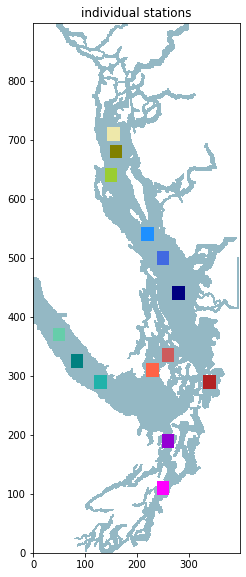

In [4]:
jdf_x = 85; jdf_y = 325; jdf_col = 'teal'
jdf2_x = 50; jdf2_y = 370; jdf2_col = 'mediumaquamarine'
jdf3_x = 130; jdf3_y = 290; jdf3_col = 'lightseagreen'

cs_x = 250; cs_y = 500; cs_col = 'royalblue'
cs2_x = 280; cs2_y = 440; cs2_col = 'navy'
cs3_x = 220; cs3_y = 540; cs3_col = 'dodgerblue'

haro_x = 230; haro_y = 310; haro_col = 'tomato'
haro2_x = 340; haro2_y = 290; haro2_col = 'firebrick'
haro3_x = 260; haro3_y = 335; haro3_col = 'indianred'


ns_x = 160; ns_y = 680; ns_col = 'olive'
ns2_x = 150; ns2_y = 640; ns2_col = 'yellowgreen'
ns3_x = 155; ns3_y = 710; ns3_col = 'palegoldenrod'

ps_x = 250; ps_y = 110; ps_col = 'magenta'
ps2_x = 260; ps2_y = 190; ps2_col = 'darkviolet'
# ps2_x = 
w = nc.Dataset('/data/tjarniko/results/hindcast.201905_dayavg_OmA-pH-pCO2/OmA_plus_20070104.nc')
pco2 = w['model_output']['pCO2'][:]
pco2[pco2>2e5] = np.nan
pco2[pco2<2000] = 500
fact = 1.5
fig = plt.figure(figsize=(12*fact,6.5*fact))

ax0 = fig.add_subplot(1,2,1)
#toba and bute

im = ax0.pcolormesh(pco2, cmap=cm.balance_r, vmin = 0, vmax = 800)
viz_tools.set_aspect(ax0)
#jdf
rect_jdf = Rectangle((jdf_x-10,jdf_y-10),20,20,linewidth=2,edgecolor=jdf_col,facecolor=jdf_col)
ax0.add_patch(rect_jdf)
rect_jdf = Rectangle((jdf2_x-10,jdf2_y-10),20,20,linewidth=2,edgecolor=jdf2_col,facecolor=jdf2_col)
ax0.add_patch(rect_jdf)
rect_jdf = Rectangle((jdf3_x-10,jdf3_y-10),20,20,linewidth=2,edgecolor=jdf3_col,facecolor=jdf3_col)
ax0.add_patch(rect_jdf)

rect_haro = Rectangle((haro_x-10,haro_y-10),20,20,linewidth=2,edgecolor=haro_col,facecolor=haro_col)
ax0.add_patch(rect_haro)
rect_haro = Rectangle((haro2_x-10,haro2_y-10),20,20,linewidth=2,edgecolor=haro2_col,facecolor=haro2_col)
ax0.add_patch(rect_haro)
rect_haro = Rectangle((haro3_x-10,haro3_y-10),20,20,linewidth=2,edgecolor=haro3_col,facecolor=haro3_col)
ax0.add_patch(rect_haro)

rect_cs = Rectangle((cs_x-10,cs_y-10),20,20,linewidth=2,edgecolor=cs_col,facecolor=cs_col)
ax0.add_patch(rect_cs)
rect_cs = Rectangle((cs2_x-10,cs2_y-10),20,20,linewidth=2,edgecolor=cs2_col,facecolor=cs2_col)
ax0.add_patch(rect_cs)
rect_cs = Rectangle((cs3_x-10,cs3_y-10),20,20,linewidth=2,edgecolor=cs3_col,facecolor=cs3_col)
ax0.add_patch(rect_cs)

rect_ns = Rectangle((ns_x-10,ns_y-10),20,20,linewidth=2,edgecolor=ns_col,facecolor=ns_col)
ax0.add_patch(rect_ns)
rect_ns = Rectangle((ns2_x-10,ns2_y-10),20,20,linewidth=2,edgecolor=ns2_col,facecolor=ns2_col)
ax0.add_patch(rect_ns)
rect_ns = Rectangle((ns3_x-10,ns3_y-10),20,20,linewidth=2,edgecolor=ns3_col,facecolor=ns3_col)
ax0.add_patch(rect_ns)

rect_ps = Rectangle((ps_x-10,ps_y-10),20,20,linewidth=2,edgecolor=ps_col,facecolor=ps_col)
ax0.add_patch(rect_ps)
rect_ps = Rectangle((ps2_x-10,ps2_y-10),20,20,linewidth=2,edgecolor=ps2_col,facecolor=ps2_col)
ax0.add_patch(rect_ps)


ax0.set_title('individual stations')



## undersaturated percents are calculated in:
    KEY_OMA OmA_percent_domain_cells_undersaturated_calculator

# code for extracting OmA averages -winter/summer

In [5]:
# start ='2015-06-01'
# end ='2015-08-31'

# start_run = arrow.get(start)
# end_run = arrow.get(end)

# arrow_array = []

# for r in arrow.Arrow.span_range('day', start_run, end_run):
#     arrow_array.append(r)

# dayslen = len(arrow_array)

# BR_oma_summer = np.zeros([dayslen,40,898,398])

# for i in range(0,dayslen):

#     tdate = arrow_array[i][0]
#     ymd = tdate.format('YYYYMMDD')

#     if i%10 == 0:
#         print(ymd)
#     t_pco2 = nc.Dataset('//data/tjarniko/results/BASERUN_EXP/Oma_calc/PI9_OmA_plus_'+ymd+'.nc')
#     t_Oma = t_pco2['model_output']['OmA'][:,:,:]
#     BR_oma_summer[i,:,:,:] = t_Oma

# BR_oma_summer_mean = np.nanmean(BR_oma_summer,axis=0)
# pickle.dump(BR_oma_summer_mean, open("../pkls/PI9_Oma_SUMMERmean_01jun_31aug.pkl", 'wb'))
# print(np.shape(BR_oma_summer_mean))

# start ='2015-12-01'
# end ='2015-12-31'

# start_run = arrow.get(start)
# end_run = arrow.get(end)

# arrow_array1 = []

# for r in arrow.Arrow.span_range('day', start_run, end_run):
#     arrow_array1.append(r)
# dayslen = len(arrow_array1)

# BR_oma_winter1 = np.zeros([dayslen,40,898,398])

# for i in range(0,dayslen):

#     tdate = arrow_array1[i][0]
#     ymd = tdate.format('YYYYMMDD')

#     if i%10 == 0:
#         print(ymd)
#     t_pco2 = nc.Dataset('//data/tjarniko/results/BASERUN_EXP/Oma_calc/PI9_OmA_plus_'+ymd+'.nc')
#     t_Oma = t_pco2['model_output']['OmA'][:,:,:]
#     BR_oma_winter1[i,:,:,:] = t_Oma

# start ='2015-01-01'
# end ='2015-02-28'

# start_run = arrow.get(start)
# end_run = arrow.get(end)
# arrow_array2 = []

# for r in arrow.Arrow.span_range('day', start_run, end_run):
#     arrow_array2.append(r)
# dayslen = len(arrow_array2)

# BR_oma_winter2 = np.zeros([dayslen,40,898,398])

# for i in range(0,dayslen):

#     tdate = arrow_array2[i][0]
#     ymd = tdate.format('YYYYMMDD')

#     if i%10 == 0:
#         print(ymd)
#     t_pco2 = nc.Dataset('//data/tjarniko/results/BASERUN_EXP/Oma_calc/PI9_OmA_plus_'+ymd+'.nc')
#     t_Oma = t_pco2['model_output']['OmA'][:,:,:]
#     BR_oma_winter2[i,:,:,:] = t_Oma

# BR_oma_winter = np.concatenate((BR_oma_winter1,BR_oma_winter2),axis=0)
# print(np.shape(BR_oma_winter))
# BR_oma_winter_mean = np.nanmean(BR_oma_winter,axis=0)
# pickle.dump(BR_oma_winter_mean, open("../pkls/PI9_Oma_WINTERmean_01dec_28feb.pkl", 'wb'))




In [6]:
BR_summer_3mon = pickle.load(open('../pkls/aragonite/BR3_Oma_SUMMERmean_01jun_31aug.pkl', 'rb'))  
BR_winter_3mon = pickle.load(open('../pkls/aragonite/BR3_Oma_WINTERmean_01dec_28feb.pkl', 'rb'))  
PI_summer_3mon = pickle.load(open('../pkls/PI9_Oma_SUMMERmean_01jun_31aug.pkl', 'rb'))  
PI_winter_3mon = pickle.load(open('../pkls/PI9_Oma_WINTERmean_01dec_28feb.pkl', 'rb'))  



In [7]:
PI_12stns_mean_std_summer = np.zeros([12,40,2])
PI_12stns_mean_std_winter = np.zeros([12,40,2])
BR_12stns_mean_std_summer = np.zeros([12,40,2])
BR_12stns_mean_std_winter = np.zeros([12,40,2])


In [8]:
print(np.shape(PI_winter_3mon))

(40, 898, 398)


In [9]:
stn_xs = [jdf_x,jdf2_x,jdf3_x,cs_x,cs2_x,cs3_x,haro_x,haro2_x,haro3_x,ns_x,ns2_x,ns3_x]
stn_ys = [jdf_y,jdf2_y,jdf3_y,cs_y,cs2_y,cs3_y,haro_y,haro2_y,haro3_y,ns_y,ns2_y,ns3_y]

stn_cols = ['teal','mediumaquamarine','lightseagreen',\
            'royalblue','navy','dodgerblue',\
           'tomato','firebrick','indianred',\
           'olive','yellowgreen','palegoldenrod']

for i in range(0,12):
    
    t_stn_x = stn_xs[i]
    t_stn_y = stn_ys[i]
    
    t_test = PI_winter_3mon[:,t_stn_y-10:t_stn_y+10,t_stn_x-10:t_stn_x+10]
    t_test[t_test>1e10]= np.nan
    t_prof_mean = np.zeros(40)
    t_prof_std = np.zeros(40)
    for d in range(0,40):
        t_prof_mean[d] = np.nanmean(t_test[d,:,:])
        t_prof_std[d] = np.nanstd(t_test[d,:,:])
    PI_12stns_mean_std_winter[i,:,0] = t_prof_mean
    PI_12stns_mean_std_winter[i,:,1] = t_prof_std
    
    t_test = PI_summer_3mon[:,t_stn_y-10:t_stn_y+10,t_stn_x-10:t_stn_x+10]
    t_test[t_test>1e10]= np.nan
    t_prof_mean = np.zeros(40)
    t_prof_std = np.zeros(40)
    for d in range(0,40):
        t_prof_mean[d] = np.nanmean(t_test[d,:,:])
        t_prof_std[d] = np.nanstd(t_test[d,:,:])
    PI_12stns_mean_std_summer[i,:,0] = t_prof_mean
    PI_12stns_mean_std_summer[i,:,1] = t_prof_std
    
    t_test = BR_winter_3mon[:,t_stn_y-10:t_stn_y+10,t_stn_x-10:t_stn_x+10]
    t_test[t_test>1e10]= np.nan
    t_prof_mean = np.zeros(40)
    t_prof_std = np.zeros(40)
    for d in range(0,40):
        t_prof_mean[d] = np.nanmean(t_test[d,:,:])
        t_prof_std[d] = np.nanstd(t_test[d,:,:])
    BR_12stns_mean_std_winter[i,:,0] = t_prof_mean
    BR_12stns_mean_std_winter[i,:,1] = t_prof_std
    
    t_test = BR_summer_3mon[:,t_stn_y-10:t_stn_y+10,t_stn_x-10:t_stn_x+10]
    t_test[t_test>1e10]= np.nan
    t_prof_mean = np.zeros(40)
    t_prof_std = np.zeros(40)
    for d in range(0,40):
        t_prof_mean[d] = np.nanmean(t_test[d,:,:])
        t_prof_std[d] = np.nanstd(t_test[d,:,:])
    BR_12stns_mean_std_summer[i,:,0] = t_prof_mean
    BR_12stns_mean_std_summer[i,:,1] = t_prof_std

In [10]:
for i in range(6,7):
    
    t_stn_x = stn_xs[i]
    t_stn_y = stn_ys[i]
    
    t_test = PI_winter_3mon[:,t_stn_y-10:t_stn_y+10,t_stn_x-10:t_stn_x+10]
    t_prof_mean = np.zeros(40)
    t_prof_std = np.zeros(40)
    
    for d in range(0,40):
        print(t_test[d,:,:])
        t_prof_mean[d] = np.nanmean(t_test[d,:,:])
        print()

[[1.37209972 1.36854515 1.36710569 1.36662445 1.36683226 1.3675372
  1.36877191 1.36926342 1.36977212 1.3703002  1.37126815 1.37280167
  1.37459694 1.37602647 1.37745682 1.37867576 1.37969934 1.38024171
  1.38098299 1.38280089]
 [1.37141766 1.36854875 1.36714836 1.36668415 1.36690208 1.36755631
  1.36811808 1.36857368 1.3687911  1.36939613 1.37036598 1.37166566
  1.37325912 1.37466752 1.37606811 1.37737522 1.37831976 1.37901347
  1.37987063 1.38182625]
 [1.371529   1.36845831 1.36716991 1.36636193 1.36647255 1.36694293
  1.36764126 1.36795415 1.36819038 1.36853077 1.36928038 1.37032934
  1.37182674 1.37314449 1.37448558 1.37566437 1.37688359 1.37766562
  1.37855681 1.38062386]
 [1.37167573 1.36884369 1.36757602 1.3667059  1.36685317 1.36702553
  1.36740529 1.36766323 1.36749203 1.36770441 1.36822652 1.3690511
  1.37039172 1.37165803 1.37296471 1.37408293 1.37529324 1.37638737
  1.37712652 1.37914824]
 [1.37254625 1.36929941 1.36766671 1.36674267 1.36653043 1.36664624
  1.36689675 1.366

[[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan

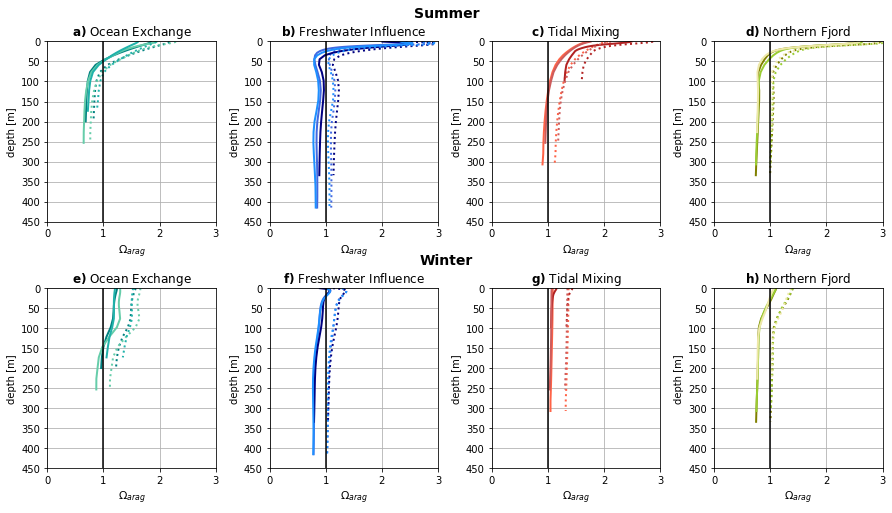

In [11]:
fact = 0.5
fs = 12
mesh = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
depths = mesh['gdept_1d'][:]
zdepth = depths[0]

#fig = plt.figure(figsize=(19*(.55)/2.54, (23/3)/2.54), dpi = 300)

fig, axs = plt.subplots(2,4, figsize=(25*fact, 14*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
plt.subplots_adjust(hspace=0.55)



for i in range(0,3):
    axs[0].plot(BR_12stns_mean_std_summer[i,:,0],zdepth, \
             linestyle = '-', linewidth = 2, color = stn_cols[i])
    axs[0].plot(PI_12stns_mean_std_summer[i,:,0],zdepth, \
             linestyle = ':', linewidth = 2, color = stn_cols[i])
for i in range(3,6):
    axs[1].plot(BR_12stns_mean_std_summer[i,:,0],zdepth, \
             linestyle = '-', linewidth = 2, color = stn_cols[i])
    axs[1].plot(PI_12stns_mean_std_summer[i,:,0],zdepth, \
             linestyle = ':', linewidth = 2, color = stn_cols[i])
for i in range(6,9):
    axs[2].plot(BR_12stns_mean_std_summer[i,:,0],zdepth, \
             linestyle = '-', linewidth = 2, color = stn_cols[i])
    axs[2].plot(PI_12stns_mean_std_summer[i,:,0],zdepth, \
             linestyle = ':', linewidth = 2, color = stn_cols[i])
for i in range(9,12):
    axs[3].plot(BR_12stns_mean_std_summer[i,:,0],zdepth, \
             linestyle = '-', linewidth = 2, color = stn_cols[i])
    axs[3].plot(PI_12stns_mean_std_summer[i,:,0],zdepth, \
             linestyle = ':', linewidth = 2, color = stn_cols[i])
    
    
####
for i in range(0,3):
    axs[4].plot(BR_12stns_mean_std_winter[i,:,0],zdepth, \
             linestyle = '-', linewidth = 2, color = stn_cols[i])
    axs[4].plot(PI_12stns_mean_std_winter[i,:,0],zdepth, \
             linestyle = ':', linewidth = 2, color = stn_cols[i])
for i in range(3,6):
    axs[5].plot(BR_12stns_mean_std_winter[i,:,0],zdepth, \
             linestyle = '-', linewidth = 2, color = stn_cols[i])
    axs[5].plot(PI_12stns_mean_std_winter[i,:,0],zdepth, \
             linestyle = ':', linewidth = 2, color = stn_cols[i])
for i in range(6,9):
    axs[6].plot(BR_12stns_mean_std_winter[i,:,0],zdepth, \
             linestyle = '-', linewidth = 2, color = stn_cols[i])
    axs[6].plot(PI_12stns_mean_std_winter[i,:,0],zdepth, \
             linestyle = ':', linewidth = 2, color = stn_cols[i])
for i in range(9,12):
    axs[7].plot(BR_12stns_mean_std_winter[i,:,0],zdepth, \
             linestyle = '-', linewidth = 2, color = stn_cols[i])
    axs[7].plot(PI_12stns_mean_std_winter[i,:,0],zdepth, \
             linestyle = ':', linewidth = 2, color = stn_cols[i])
for i in range(0,8):
    
    axs[i].axvline(x=1, color = 'k', linestyle = '-')
    axs[i].set_xlim([0,3])
    axs[i].set_ylim([0,450])
    axs[i].invert_yaxis()
    axs[i].set_xlabel('$\Omega_{arag}$', fontsize = 11)
    axs[i].set_ylabel('depth [m]')
    axs[i].grid()
    
    #ax6.set_title(r'$\bf{f)}$ $\Omega_{arag}$ distribution', fontsize = 8)
    axs[0].set_title(r'$\bf{a)}$ Ocean Exchange');axs[4].set_title(r'$\bf{e)}$ Ocean Exchange')
    axs[1].set_title(r'$\bf{b)}$ Freshwater Influence');axs[5].set_title(r'$\bf{f)}$ Freshwater Influence')
    axs[2].set_title(r'$\bf{c)}$ Tidal Mixing');axs[6].set_title(r'$\bf{g)}$ Tidal Mixing')
    axs[3].set_title(r'$\bf{d)}$ Northern Fjord');axs[7].set_title(r'$\bf{h)}$ Northern Fjord')
    
plt.tight_layout()
fig.text(0.5, 0.99, 'Summer', fontsize = fs+2, fontweight = 'bold', ha = 'center')
fig.text(0.5, 0.50, 'Winter', fontsize = fs+2, fontweight = 'bold', ha = 'center')


fig.savefig('./CG_FIGS/SFIG_CG_06_spatiotemp_allstations.jpg', bbox_inches='tight', dpi = 300)



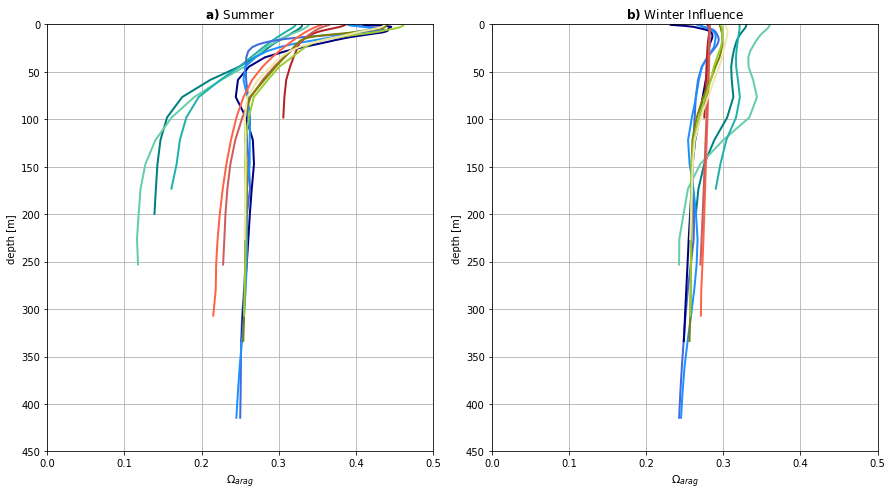

In [12]:
fact = 0.5
fs = 12
mesh = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
depths = mesh['gdept_1d'][:]
zdepth = depths[0]

#fig = plt.figure(figsize=(19*(.55)/2.54, (23/3)/2.54), dpi = 300)

fig, axs = plt.subplots(1,2, figsize=(25*fact, 14*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
plt.subplots_adjust(hspace=0.55)



for i in range(0,12):
    axs[0].plot(PI_12stns_mean_std_summer[i,:,0]-BR_12stns_mean_std_summer[i,:,0],zdepth, \
             linestyle = '-', linewidth = 2, color = stn_cols[i])
for i in range(0,12):
    axs[1].plot(PI_12stns_mean_std_winter[i,:,0]-BR_12stns_mean_std_winter[i,:,0],zdepth, \
             linestyle = '-', linewidth = 2, color = stn_cols[i])
    
    
####
# for i in range(0,3):
#     axs[0].plot(BR_12stns_mean_std_winter[i,:,0],zdepth, \
#              linestyle = '-', linewidth = 2, color = stn_cols[i])
#     axs[0].plot(PI_12stns_mean_std_winter[i,:,0],zdepth, \
#              linestyle = ':', linewidth = 2, color = stn_cols[i])
# for i in range(3,6):
#     axs[1].plot(BR_12stns_mean_std_winter[i,:,0],zdepth, \
#              linestyle = '-', linewidth = 2, color = stn_cols[i])
#     axs[1].plot(PI_12stns_mean_std_winter[i,:,0],zdepth, \
#              linestyle = ':', linewidth = 2, color = stn_cols[i])
# for i in range(6,9):
#     axs[2].plot(BR_12stns_mean_std_winter[i,:,0],zdepth, \
#              linestyle = '-', linewidth = 2, color = stn_cols[i])
#     axs[2].plot(PI_12stns_mean_std_winter[i,:,0],zdepth, \
#              linestyle = ':', linewidth = 2, color = stn_cols[i])
# for i in range(9,12):
#     axs[3].plot(BR_12stns_mean_std_winter[i,:,0],zdepth, \
#              linestyle = '-', linewidth = 2, color = stn_cols[i])
#     axs[3].plot(PI_12stns_mean_std_winter[i,:,0],zdepth, \
#              linestyle = ':', linewidth = 2, color = stn_cols[i])
for i in range(0,2):
    
    axs[i].axvline(x=1, color = 'k', linestyle = '-')
    axs[i].set_xlim([0,0.5])
    axs[i].set_ylim([0,450])
    axs[i].invert_yaxis()
    axs[i].set_xlabel('$\Omega_{arag}$', fontsize = 11)
    axs[i].set_ylabel('depth [m]')
    axs[i].grid()
    
    #ax6.set_title(r'$\bf{f)}$ $\Omega_{arag}$ distribution', fontsize = 8)
    axs[0].set_title(r'$\bf{a)}$ Summer')#;axs[4].set_title(r'$\bf{e)}$ Ocean Exchange')
    axs[1].set_title(r'$\bf{b)}$ Winter Influence')#;axs[5].set_title(r'$\bf{f)}$ Freshwater Influence')
#     axs[2].set_title(r'$\bf{c)}$ Tidal Mixing');axs[6].set_title(r'$\bf{g)}$ Tidal Mixing')
#     axs[3].set_title(r'$\bf{d)}$ Northern Fjord');axs[7].set_title(r'$\bf{h)}$ Northern Fjord')
    
plt.tight_layout()
# fig.text(0.5, 0.99, 'Winter', fontsize = fs+2, fontweight = 'bold', ha = 'center')
# fig.text(0.5, 0.50, 'Summer', fontsize = fs+2, fontweight = 'bold', ha = 'center')


#fig.savefig('./CG_FIGS/FIG_CG_06_spatiotemp.jpg', bbox_inches='tight', dpi = 300)



## To do with temporal averages is actually a bit of a faff!

In [13]:
def extractor_oma(start, end, sdir, fname, y, x):

    '''USAGE:
    
    for a given variable in raw ncs of the PILA experiment 
    found in directory tree /data/tjarniko/results/BASERUN_EXP
    take by-layer means of the variable throughout the timeperiod specified

    start = '2015-01-01' #start of timeperiod
    end = '2015-12-31' #end of timeperiod (typically a year)
    ftype = 'carp' #type of model result .nc 
    sdir = 'MAIN/BR_3rd_2015' #where under directory tree do we find ncs 
    inletmask = True #are we masking out Toba/Bute/Jervis?
    varname = 'dissolved_inorganic_carbon' #name of variable
    fname = 'BR3_DIC_means' #name of resulting pkl 
    
    import extract_bylayer_mean as ebm
    ebm.extractor(start,end,ftype,sdir, inletmask, varname, fname)
    
    '''
    import matplotlib.pyplot as plt
    import netCDF4 as nc
    import numpy as np
    import scipy as sp
    import datetime as dt
    ""
    from salishsea_tools import (
        nc_tools,
        viz_tools,
        geo_tools,
        tidetools
    )
    import netCDF4 as nc
    import cmocean as cm
    import glob
    import arrow
    import gsw
    #import gef
    import pickle

#define teh sog mask!

    mask = np.zeros([40,898,398])
    #box mask - just doing a small subset 
    
    mask[:,y-10:y+10,x-10:x+10] = 4
    
    
    #where to store
    daily_means = np.zeros((40,365))
    ncfile_ar = []
    start_run = arrow.get(start)
    end_run = arrow.get(end)
    arrow_array = []
    for r in arrow.Arrow.span_range('day', start_run, end_run):
        arrow_array.append(r)
    #no of days in array
    dayslen = len(arrow_array)
    
    for i in range(0,dayslen):
        if i%50 == 0:
            print(i)
        tdate = arrow_array[i][0]
        ddmmmyy = tdate.format('DDMMMYY').lower()
        ymd = tdate.format('YYYYMMDD')
        tpco2 = nc.Dataset(f'//data/tjarniko/results/BASERUN_EXP/Oma_calc/{sdir}_OmA_plus_{ymd}.nc')
        tdat = tpco2['model_output']['OmA'][:,:,:]

        
        
        tdat[mask != 4] = np.nan
        #no zeros
        tdat[tdat == 0] = np.nan
        tdat[tdat > 1e10] = np.nan
        
        
        tdat_alldomain = np.zeros([40])
        for q in range(0,40):
            tdat_alldomain[q] = np.nanmean(tdat[q,:,:])

        daily_means[:,i] =  tdat_alldomain
        
    
    print('finished this one')
    fname =  fname + '.pkl'
    pickle.dump(daily_means, open(fname, 'wb'))
    
    return

In [14]:


# #(start, end, ftype, sdir, varname, fname, y, x)
# pkldir = './pkls/'
# start = '2015-01-01' #start of timeperiod
# end = '2015-12-31' #end of timeperiod (typically a year)
# ftype = 'carp' #type of model result .nc 
# sdir = 'PI9' #where under directory tree do we find nps 
# varname = 'dissolved_inorganic_carbon' #name of variable


# jdf_x = 85; jdf_y = 325; jdf_col = 'teal'
# jdf2_x = 50; jdf2_y = 370; jdf2_col = 'mediumaquamarine'
# jdf3_x = 130; jdf3_y = 290; jdf3_col = 'lightseagreen'

# cs_x = 250; cs_y = 500; cs_col = 'royalblue'
# cs2_x = 280; cs2_y = 440; cs2_col = 'navy'
# cs3_x = 220; cs3_y = 540; cs3_col = 'dodgerblue'

# haro_x = 230; haro_y = 310; haro_col = 'tomato'
# haro2_x = 340; haro2_y = 290; haro2_col = 'firebrick'
# haro3_x = 260; haro3_y = 335; haro3_col = 'indianred'


# ns_x = 160; ns_y = 680; ns_col = 'olive'
# ns2_x = 150; ns2_y = 640; ns2_col = 'yellowgreen'
# ns3_x = 155; ns3_y = 710; ns3_col = 'palegoldenrod'


# fname = pkldir + 'PI9_OMA_means_cs2_BOX'
# y = cs2_y; x = cs2_x
# extractor_oma(start, end, sdir, fname,  y, x )
# fname = pkldir + 'PI9_OMA_means_cs_BOX'
# y = cs_y; x = cs_x
# extractor_oma(start, end, sdir, fname,  y, x )
# fname = pkldir + 'PI9_OMA_means_cs3_BOX'
# y = cs3_y; x = cs3_x
# extractor_oma(start, end, sdir, fname,  y, x )
# fname = pkldir + 'PI9_OMA_means_haro2_BOX'
# y = haro2_y; x = haro2_x
# extractor_oma(start, end, sdir, fname,  y, x )
# fname = pkldir + 'PI9_OMA_means_haro_BOX'
# y = haro_y; x = haro_x
# extractor_oma(start, end, sdir, fname,  y, x )
# fname = pkldir + 'PI9_OMA_means_haro3_BOX'
# y = haro3_y; x = haro3_x
# extractor_oma(start, end, sdir, fname,  y, x )
# fname = pkldir + 'PI9_OMA_means_jdf2_BOX'
# y = jdf2_y; x = jdf2_x
# extractor_oma(start, end, sdir, fname,  y, x )
# fname = pkldir + 'PI9_OMA_means_jdf_BOX'
# y = jdf_y; x = jdf_x
# extractor_oma(start, end, sdir, fname,  y, x )
# fname = pkldir + 'PI9_OMA_means_jdf3_BOX'
# y = jdf3_y; x = jdf3_x
# extractor_oma(start, end, sdir, fname,  y, x )
# fname = pkldir + 'PI9_OMA_means_ns2_BOX'
# y = ns2_y; x = ns2_x
# extractor_oma(start, end, sdir, fname,  y, x )
# fname = pkldir + 'PI9_OMA_means_ns_BOX'
# y = ns_y; x = ns_x
# extractor_oma(start, end, sdir, fname,  y, x )
# fname = pkldir + 'PI9_OMA_means_ns3_BOX'
# y = ns3_y; x = ns3_x
# extractor_oma(start, end, sdir, fname,  y, x )


In [15]:


# #(start, end, ftype, sdir, varname, fname, y, x)
# pkldir = './pkls/'
# start = '2015-01-01' #start of timeperiod
# end = '2015-12-31' #end of timeperiod (typically a year)
# ftype = 'carp' #type of model result .nc 
# sdir = 'BR3' #where under directory tree do we find nps 
# varname = 'dissolved_inorganic_carbon' #name of variable


# jdf_x = 85; jdf_y = 325; jdf_col = 'teal'
# jdf2_x = 50; jdf2_y = 370; jdf2_col = 'mediumaquamarine'
# jdf3_x = 130; jdf3_y = 290; jdf3_col = 'lightseagreen'

# cs_x = 250; cs_y = 500; cs_col = 'royalblue'
# cs2_x = 280; cs2_y = 440; cs2_col = 'navy'
# cs3_x = 220; cs3_y = 540; cs3_col = 'dodgerblue'

# haro_x = 230; haro_y = 310; haro_col = 'tomato'
# haro2_x = 340; haro2_y = 290; haro2_col = 'firebrick'
# haro3_x = 260; haro3_y = 335; haro3_col = 'indianred'


# ns_x = 160; ns_y = 680; ns_col = 'olive'
# ns2_x = 150; ns2_y = 640; ns2_col = 'yellowgreen'
# ns3_x = 155; ns3_y = 710; ns3_col = 'palegoldenrod'


# fname = pkldir + 'BR3_OMA_means_cs2_BOX'
# y = cs2_y; x = cs2_x
# extractor_oma(start, end, sdir, fname,  y, x )
# fname = pkldir + 'BR3_OMA_means_cs_BOX'
# y = cs_y; x = cs_x
# extractor_oma(start, end, sdir, fname,  y, x )
# fname = pkldir + 'BR3_OMA_means_cs3_BOX'
# y = cs3_y; x = cs3_x
# extractor_oma(start, end, sdir, fname,  y, x )
# fname = pkldir + 'BR3_OMA_means_haro2_BOX'
# y = haro2_y; x = haro2_x
# extractor_oma(start, end, sdir, fname,  y, x )
# fname = pkldir + 'BR3_OMA_means_haro_BOX'
# y = haro_y; x = haro_x
# extractor_oma(start, end, sdir, fname,  y, x )
# fname = pkldir + 'BR3_OMA_means_haro3_BOX'
# y = haro3_y; x = haro3_x
# extractor_oma(start, end, sdir, fname,  y, x )
# fname = pkldir + 'BR3_OMA_means_jdf2_BOX'
# y = jdf2_y; x = jdf2_x
# extractor_oma(start, end, sdir, fname,  y, x )
# fname = pkldir + 'BR3_OMA_means_jdf_BOX'
# y = jdf_y; x = jdf_x
# extractor_oma(start, end, sdir, fname,  y, x )
# fname = pkldir + 'BR3_OMA_means_jdf3_BOX'
# y = jdf3_y; x = jdf3_x
# extractor_oma(start, end, sdir, fname,  y, x )
# fname = pkldir + 'BR3_OMA_means_ns2_BOX'
# y = ns2_y; x = ns2_x
# extractor_oma(start, end, sdir, fname,  y, x )
# fname = pkldir + 'BR3_OMA_means_ns_BOX'
# y = ns_y; x = ns_x
# extractor_oma(start, end, sdir, fname,  y, x )
# fname = pkldir + 'BR3_OMA_means_ns3_BOX'
# y = ns3_y; x = ns3_x
# extractor_oma(start, end, sdir, fname,  y, x )


In [16]:
## open some stuff

BR3_cs =  pickle.load(open('./pkls/BR3_OMA_means_cs_BOX.pkl', 'rb'))  
BR3_ns =  pickle.load(open('./pkls/BR3_OMA_means_ns_BOX.pkl', 'rb'))  
BR3_haro =  pickle.load(open('./pkls/BR3_OMA_means_haro_BOX.pkl', 'rb'))  
BR3_jdf =  pickle.load(open('./pkls/BR3_OMA_means_jdf_BOX.pkl', 'rb'))  

BR3_cs2 =  pickle.load(open('./pkls/BR3_OMA_means_cs2_BOX.pkl', 'rb'))  
BR3_ns2 =  pickle.load(open('./pkls/BR3_OMA_means_ns2_BOX.pkl', 'rb'))  
BR3_haro2 =  pickle.load(open('./pkls/BR3_OMA_means_haro2_BOX.pkl', 'rb'))  
BR3_jdf2 =  pickle.load(open('./pkls/BR3_OMA_means_jdf2_BOX.pkl', 'rb'))  

BR3_cs3 =  pickle.load(open('./pkls/BR3_OMA_means_cs3_BOX.pkl', 'rb'))  
BR3_ns3 =  pickle.load(open('./pkls/BR3_OMA_means_ns3_BOX.pkl', 'rb'))  
BR3_haro3 =  pickle.load(open('./pkls/BR3_OMA_means_haro3_BOX.pkl', 'rb'))  
BR3_jdf3 =  pickle.load(open('./pkls/BR3_OMA_means_jdf3_BOX.pkl', 'rb'))  

## open some stuff

PI9_cs =  pickle.load(open('./pkls/PI9_OMA_means_cs_BOX.pkl', 'rb'))  
PI9_ns =  pickle.load(open('./pkls/PI9_OMA_means_ns_BOX.pkl', 'rb'))  
PI9_haro =  pickle.load(open('./pkls/PI9_OMA_means_haro_BOX.pkl', 'rb'))  
PI9_jdf =  pickle.load(open('./pkls/PI9_OMA_means_jdf_BOX.pkl', 'rb'))  

PI9_cs2 =  pickle.load(open('./pkls/PI9_OMA_means_cs2_BOX.pkl', 'rb'))  
PI9_ns2 =  pickle.load(open('./pkls/PI9_OMA_means_ns2_BOX.pkl', 'rb'))  
PI9_haro2 =  pickle.load(open('./pkls/PI9_OMA_means_haro2_BOX.pkl', 'rb'))  
PI9_jdf2 =  pickle.load(open('./pkls/PI9_OMA_means_jdf2_BOX.pkl', 'rb'))  

PI9_cs3 =  pickle.load(open('./pkls/PI9_OMA_means_cs3_BOX.pkl', 'rb'))  
PI9_ns3 =  pickle.load(open('./pkls/PI9_OMA_means_ns3_BOX.pkl', 'rb'))  
PI9_haro3 =  pickle.load(open('./pkls/PI9_OMA_means_haro3_BOX.pkl', 'rb'))  
PI9_jdf3 =  pickle.load(open('./pkls/PI9_OMA_means_jdf3_BOX.pkl', 'rb'))  


In [17]:
#s

# start ='2015-06-01'
# end ='2015-08-31'

BR3_cs_summer = BR3_cs[:,151:243]
BR3_cs_winter = np.concatenate((BR3_cs[:,0:59],BR3_cs[:,334:365]), axis = 1)
BR3_ns_summer = BR3_ns[:,151:243]
BR3_ns_winter = np.concatenate((BR3_ns[:,0:59],BR3_ns[:,334:365]), axis = 1)
BR3_haro_summer = BR3_haro[:,151:243]
BR3_haro_winter = np.concatenate((BR3_haro[:,0:59],BR3_haro[:,334:365]), axis = 1)
BR3_jdf_summer = BR3_jdf[:,151:243]
BR3_jdf_winter = np.concatenate((BR3_jdf[:,0:59],BR3_jdf[:,334:365]), axis = 1)

BR3_cs2_summer = BR3_cs2[:,151:243]
BR3_cs2_winter = np.concatenate((BR3_cs2[:,0:59],BR3_cs2[:,334:365]), axis = 1)
BR3_ns2_summer = BR3_ns2[:,151:243]
BR3_ns2_winter = np.concatenate((BR3_ns2[:,0:59],BR3_ns2[:,334:365]), axis = 1)
BR3_haro2_summer = BR3_haro2[:,151:243]
BR3_haro2_winter = np.concatenate((BR3_haro2[:,0:59],BR3_haro2[:,334:365]), axis = 1)
BR3_jdf2_summer = BR3_jdf2[:,151:243]
BR3_jdf2_winter = np.concatenate((BR3_jdf2[:,0:59],BR3_jdf2[:,334:365]), axis = 1)

BR3_cs3_summer = BR3_cs3[:,151:343]
BR3_cs3_winter = np.concatenate((BR3_cs3[:,0:59],BR3_cs3[:,334:365]), axis = 1)
BR3_ns3_summer = BR3_ns3[:,151:343]
BR3_ns3_winter = np.concatenate((BR3_ns3[:,0:59],BR3_ns3[:,334:365]), axis = 1)
BR3_haro3_summer = BR3_haro3[:,151:343]
BR3_haro3_winter = np.concatenate((BR3_haro3[:,0:59],BR3_haro3[:,334:365]), axis = 1)
BR3_jdf3_summer = BR3_jdf3[:,151:343]
BR3_jdf3_winter = np.concatenate((BR3_jdf3[:,0:59],BR3_jdf3[:,334:365]), axis = 1)

PI9_cs_summer = PI9_cs[:,151:243]
PI9_cs_winter = np.concatenate((PI9_cs[:,0:59],PI9_cs[:,334:365]), axis = 1)
PI9_ns_summer = PI9_ns[:,151:243]
PI9_ns_winter = np.concatenate((PI9_ns[:,0:59],PI9_ns[:,334:365]), axis = 1)
PI9_haro_summer = PI9_haro[:,151:243]
PI9_haro_winter = np.concatenate((PI9_haro[:,0:59],PI9_haro[:,334:365]), axis = 1)
PI9_jdf_summer = PI9_jdf[:,151:243]
PI9_jdf_winter = np.concatenate((PI9_jdf[:,0:59],PI9_jdf[:,334:365]), axis = 1)

PI9_cs2_summer = PI9_cs2[:,151:243]
PI9_cs2_winter = np.concatenate((PI9_cs2[:,0:59],PI9_cs2[:,334:365]), axis = 1)
PI9_ns2_summer = PI9_ns2[:,151:243]
PI9_ns2_winter = np.concatenate((PI9_ns2[:,0:59],PI9_ns2[:,334:365]), axis = 1)
PI9_haro2_summer = PI9_haro2[:,151:243]
PI9_haro2_winter = np.concatenate((PI9_haro2[:,0:59],PI9_haro2[:,334:365]), axis = 1)
PI9_jdf2_summer = PI9_jdf2[:,151:243]
PI9_jdf2_winter = np.concatenate((PI9_jdf2[:,0:59],PI9_jdf2[:,334:365]), axis = 1)

PI9_cs3_summer = PI9_cs3[:,151:343]
PI9_cs3_winter = np.concatenate((PI9_cs3[:,0:59],PI9_cs3[:,334:365]), axis = 1)
PI9_ns3_summer = PI9_ns3[:,151:343]
PI9_ns3_winter = np.concatenate((PI9_ns3[:,0:59],PI9_ns3[:,334:365]), axis = 1)
PI9_haro3_summer = PI9_haro3[:,151:343]
PI9_haro3_winter = np.concatenate((PI9_haro3[:,0:59],PI9_haro3[:,334:365]), axis = 1)
PI9_jdf3_summer = PI9_jdf3[:,151:343]
PI9_jdf3_winter = np.concatenate((PI9_jdf3[:,0:59],PI9_jdf3[:,334:365]), axis = 1)

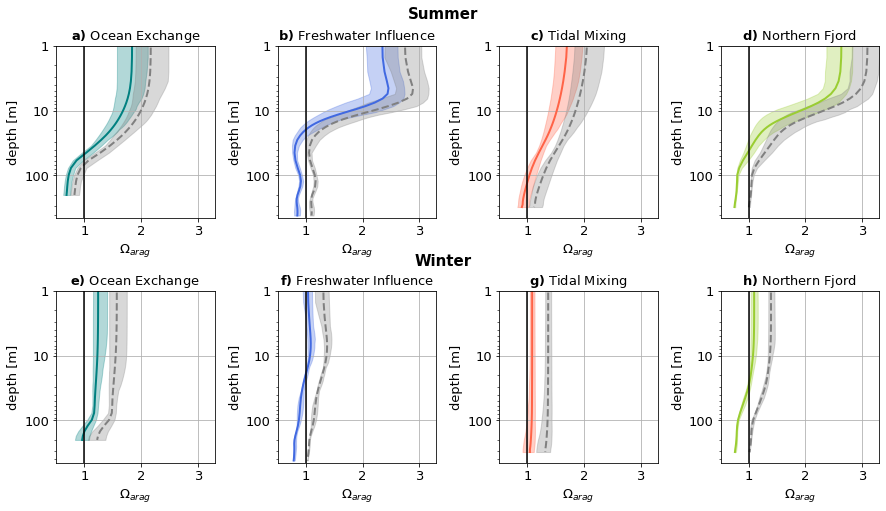

In [18]:
import matplotlib.ticker as mticker
fact = 0.5
fs = 13

plt.rcParams.update({'font.size': 13})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 13}


mesh = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
depths = mesh['gdept_1d'][:]
zdepth = depths[0]

#fig = plt.figure(figsize=(19*(.55)/2.54, (23/3)/2.54), dpi = 300)

fig, axs = plt.subplots(2,4, figsize=(25*fact, 14*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
plt.subplots_adjust(hspace=0.55)

tdat = BR3_jdf_summer; tcol = jdf_col
tmean = np.nanmean(tdat,axis = 1); tstd = np.nanstd(tdat,axis = 1)
tmax = np.nanmax(tdat,axis = 1); tmin = np.nanmin(tdat,axis = 1)
per10 = np.percentile(tdat, 10, axis=1); per90 = np.percentile(tdat, 90, axis=1)
axs[0].plot(tmean,zdepth, linestyle = '-', linewidth = 2, color = tcol)
axs[0].fill_betweenx(zdepth,per10,per90, color = tcol, alpha = 0.3)

tdat = PI9_jdf_summer
tmean = np.nanmean(tdat,axis = 1); tstd = np.nanstd(tdat,axis = 1)
tmax = np.nanmax(tdat,axis = 1); tmin = np.nanmin(tdat,axis = 1)
per10 = np.percentile(tdat, 10, axis=1); per90 = np.percentile(tdat, 90, axis=1)
axs[0].plot(tmean,zdepth, linestyle = '--', linewidth = 2, color = 'grey')
axs[0].fill_betweenx(zdepth,per10,per90, color = 'grey', alpha = 0.3)

# ##########
tdat = BR3_cs_summer; tcol = cs_col
tmean = np.nanmean(tdat,axis = 1); tstd = np.nanstd(tdat,axis = 1)
tmax = np.nanmax(tdat,axis = 1); tmin = np.nanmin(tdat,axis = 1)
per10 = np.percentile(tdat, 10, axis=1); per90 = np.percentile(tdat, 90, axis=1)
axs[1].plot(tmean,zdepth, linestyle = '-', linewidth = 2, color = tcol)
axs[1].fill_betweenx(zdepth,per10,per90, color = tcol, alpha = 0.3)

tdat = PI9_cs_summer
tmean = np.nanmean(tdat,axis = 1); tstd = np.nanstd(tdat,axis = 1)
tmax = np.nanmax(tdat,axis = 1); tmin = np.nanmin(tdat,axis = 1)
per10 = np.percentile(tdat, 10, axis=1); per90 = np.percentile(tdat, 90, axis=1)
axs[1].plot(tmean,zdepth, linestyle = '--', linewidth = 2, color = 'grey')
axs[1].fill_betweenx(zdepth,per10,per90, color = 'grey', alpha = 0.3)

#####
tdat = BR3_haro_summer; tcol = haro_col
tmean = np.nanmean(tdat,axis = 1); tstd = np.nanstd(tdat,axis = 1)
tmax = np.nanmax(tdat,axis = 1); tmin = np.nanmin(tdat,axis = 1)
per10 = np.percentile(tdat, 10, axis=1); per90 = np.percentile(tdat, 90, axis=1)
axs[2].plot(tmean,zdepth, linestyle = '-', linewidth = 2, color = tcol)
axs[2].fill_betweenx(zdepth,per10,per90, color = tcol, alpha = 0.3)

tdat = PI9_haro_summer
tmean = np.nanmean(tdat,axis = 1); tstd = np.nanstd(tdat,axis = 1)
tmax = np.nanmax(tdat,axis = 1); tmin = np.nanmin(tdat,axis = 1)
per10 = np.percentile(tdat, 10, axis=1); per90 = np.percentile(tdat, 90, axis=1)
axs[2].plot(tmean,zdepth, linestyle = '--', linewidth = 2, color = 'grey')
axs[2].fill_betweenx(zdepth,per10,per90, color = 'grey', alpha = 0.3)

####
tdat = BR3_ns2_summer; tcol = ns2_col
tmean = np.nanmean(tdat,axis = 1); tstd = np.nanstd(tdat,axis = 1)
tmax = np.nanmax(tdat,axis = 1); tmin = np.nanmin(tdat,axis = 1)
per10 = np.percentile(tdat, 10, axis=1); per90 = np.percentile(tdat, 90, axis=1)
axs[3].plot(tmean,zdepth, linestyle = '-', linewidth = 2, color = tcol)
axs[3].fill_betweenx(zdepth,per10,per90, color = tcol, alpha = 0.3)

tdat = PI9_ns2_summer
tmean = np.nanmean(tdat,axis = 1); tstd = np.nanstd(tdat,axis = 1)
tmax = np.nanmax(tdat,axis = 1); tmin = np.nanmin(tdat,axis = 1)
per10 = np.percentile(tdat, 10, axis=1); per90 = np.percentile(tdat, 90, axis=1)
axs[3].plot(tmean,zdepth, linestyle = '--', linewidth = 2, color = 'grey')
axs[3].fill_betweenx(zdepth,per10,per90, color = 'grey', alpha = 0.3)

######
tdat = BR3_jdf_winter; tcol = jdf_col
tmean = np.nanmean(tdat,axis = 1); tstd = np.nanstd(tdat,axis = 1)
tmax = np.nanmax(tdat,axis = 1); tmin = np.nanmin(tdat,axis = 1)
per10 = np.percentile(tdat, 10, axis=1); per90 = np.percentile(tdat, 90, axis=1)
axs[4].plot(tmean,zdepth, linestyle = '-', linewidth = 2, color = tcol)
axs[4].fill_betweenx(zdepth,per10,per90, color = tcol, alpha = 0.3)

tdat = PI9_jdf_winter
tmean = np.nanmean(tdat,axis = 1); tstd = np.nanstd(tdat,axis = 1)
tmax = np.nanmax(tdat,axis = 1); tmin = np.nanmin(tdat,axis = 1)
per10 = np.percentile(tdat, 10, axis=1); per90 = np.percentile(tdat, 90, axis=1)
axs[4].plot(tmean,zdepth, linestyle = '--', linewidth = 2, color = 'grey')
axs[4].fill_betweenx(zdepth,per10,per90, color = 'grey', alpha = 0.3)

# ##########
tdat = BR3_cs_winter; tcol = cs_col
tmean = np.nanmean(tdat,axis = 1); tstd = np.nanstd(tdat,axis = 1)
tmax = np.nanmax(tdat,axis = 1); tmin = np.nanmin(tdat,axis = 1)
per10 = np.percentile(tdat, 10, axis=1); per90 = np.percentile(tdat, 90, axis=1)
axs[5].plot(tmean,zdepth, linestyle = '-', linewidth = 2, color = tcol)
axs[5].fill_betweenx(zdepth,per10,per90, color = tcol, alpha = 0.3)

tdat = PI9_cs_winter
tmean = np.nanmean(tdat,axis = 1); tstd = np.nanstd(tdat,axis = 1)
tmax = np.nanmax(tdat,axis = 1); tmin = np.nanmin(tdat,axis = 1)
per10 = np.percentile(tdat, 10, axis=1); per90 = np.percentile(tdat, 90, axis=1)
axs[5].plot(tmean,zdepth, linestyle = '--', linewidth = 2, color = 'grey')
axs[5].fill_betweenx(zdepth,per10,per90, color = 'grey', alpha = 0.3)

#####
tdat = BR3_haro_winter; tcol = haro_col
tmean = np.nanmean(tdat,axis = 1); tstd = np.nanstd(tdat,axis = 1)
tmax = np.nanmax(tdat,axis = 1); tmin = np.nanmin(tdat,axis = 1)
per10 = np.percentile(tdat, 10, axis=1); per90 = np.percentile(tdat, 90, axis=1)
axs[6].plot(tmean,zdepth, linestyle = '-', linewidth = 2, color = tcol)
axs[6].fill_betweenx(zdepth,per10,per90, color = tcol, alpha = 0.3)

tdat = PI9_haro_winter
tmean = np.nanmean(tdat,axis = 1); tstd = np.nanstd(tdat,axis = 1)
tmax = np.nanmax(tdat,axis = 1); tmin = np.nanmin(tdat,axis = 1)
per10 = np.percentile(tdat, 10, axis=1); per90 = np.percentile(tdat, 90, axis=1)
axs[6].plot(tmean,zdepth, linestyle = '--', linewidth = 2, color = 'grey')
axs[6].fill_betweenx(zdepth,per10,per90, color = 'grey', alpha = 0.3)

####
tdat = BR3_ns2_winter; tcol = ns2_col
tmean = np.nanmean(tdat,axis = 1); tstd = np.nanstd(tdat,axis = 1)
tmax = np.nanmax(tdat,axis = 1); tmin = np.nanmin(tdat,axis = 1)
per10 = np.percentile(tdat, 10, axis=1); per90 = np.percentile(tdat, 90, axis=1)
axs[7].plot(tmean,zdepth, linestyle = '-', linewidth = 2, color = tcol)
axs[7].fill_betweenx(zdepth,per10,per90, color = tcol, alpha = 0.3)

tdat = PI9_ns2_winter
tmean = np.nanmean(tdat,axis = 1); tstd = np.nanstd(tdat,axis = 1)
tmax = np.nanmax(tdat,axis = 1); tmin = np.nanmin(tdat,axis = 1)
per10 = np.percentile(tdat, 10, axis=1); per90 = np.percentile(tdat, 90, axis=1)
axs[7].plot(tmean,zdepth, linestyle = '--', linewidth = 2, color = 'grey')
axs[7].fill_betweenx(zdepth,per10,per90, color = 'grey', alpha = 0.3)


for i in range(0,8):
    
    axs[i].axvline(x=1, color = 'k', linestyle = '-')
    axs[i].set_yscale('log')
    axs[i].set_xlim([0.5,3.3])
    axs[i].set_ylim([1,450])
    
    axs[i].invert_yaxis()
    axs[i].yaxis.set_major_formatter(mticker.ScalarFormatter())
    axs[i].set_xlabel('$\Omega_{arag}$', fontsize = fs)
    axs[i].set_ylabel('depth [m]', fontsize = fs)
    axs[i].grid()
    
    
    #ax6.set_title(r'$\bf{f)}$ $\Omega_{arag}$ distribution', fontsize = 8)
    axs[0].set_title(r'$\bf{a)}$ Ocean Exchange', fontsize = fs);axs[4].set_title(r'$\bf{e)}$ Ocean Exchange', fontsize = fs)
    axs[1].set_title(r'$\bf{b)}$ Freshwater Influence', fontsize = fs);axs[5].set_title(r'$\bf{f)}$ Freshwater Influence', fontsize = fs)
    axs[2].set_title(r'$\bf{c)}$ Tidal Mixing', fontsize = fs);axs[6].set_title(r'$\bf{g)}$ Tidal Mixing', fontsize = fs)
    axs[3].set_title(r'$\bf{d)}$ Northern Fjord', fontsize = fs);axs[7].set_title(r'$\bf{h)}$ Northern Fjord', fontsize = fs)
    
plt.tight_layout()
fig.text(0.5, 0.99, 'Summer', fontsize = fs+2, fontweight = 'bold', ha = 'center')
fig.text(0.5, 0.50, 'Winter', fontsize = fs+2, fontweight = 'bold', ha = 'center')


fig.savefig('./CG_FIGS/FIG_CG_06_spatiotemp.jpg', bbox_inches='tight', dpi = 300)



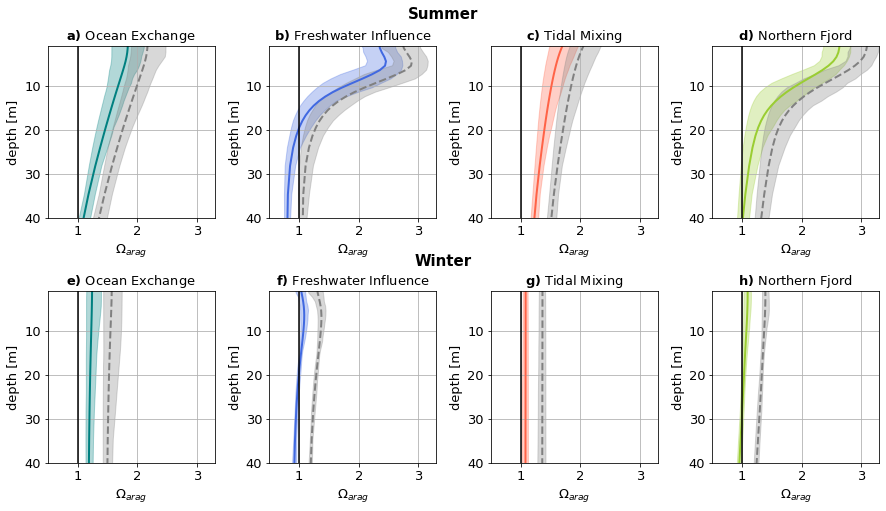

In [19]:
import matplotlib.ticker as mticker
fact = 0.5
fs = 13

plt.rcParams.update({'font.size': 13})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 13}


mesh = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
depths = mesh['gdept_1d'][:]
zdepth = depths[0]

#fig = plt.figure(figsize=(19*(.55)/2.54, (23/3)/2.54), dpi = 300)

fig, axs = plt.subplots(2,4, figsize=(25*fact, 14*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
plt.subplots_adjust(hspace=0.55)

tdat = BR3_jdf_summer; tcol = jdf_col
tmean = np.nanmean(tdat,axis = 1); tstd = np.nanstd(tdat,axis = 1)
tmax = np.nanmax(tdat,axis = 1); tmin = np.nanmin(tdat,axis = 1)
per10 = np.percentile(tdat, 10, axis=1); per90 = np.percentile(tdat, 90, axis=1)
axs[0].plot(tmean,zdepth, linestyle = '-', linewidth = 2, color = tcol)
axs[0].fill_betweenx(zdepth,per10,per90, color = tcol, alpha = 0.3)

tdat = PI9_jdf_summer
tmean = np.nanmean(tdat,axis = 1); tstd = np.nanstd(tdat,axis = 1)
tmax = np.nanmax(tdat,axis = 1); tmin = np.nanmin(tdat,axis = 1)
per10 = np.percentile(tdat, 10, axis=1); per90 = np.percentile(tdat, 90, axis=1)
axs[0].plot(tmean,zdepth, linestyle = '--', linewidth = 2, color = 'grey')
axs[0].fill_betweenx(zdepth,per10,per90, color = 'grey', alpha = 0.3)

# ##########
tdat = BR3_cs_summer; tcol = cs_col
tmean = np.nanmean(tdat,axis = 1); tstd = np.nanstd(tdat,axis = 1)
tmax = np.nanmax(tdat,axis = 1); tmin = np.nanmin(tdat,axis = 1)
per10 = np.percentile(tdat, 10, axis=1); per90 = np.percentile(tdat, 90, axis=1)
axs[1].plot(tmean,zdepth, linestyle = '-', linewidth = 2, color = tcol)
axs[1].fill_betweenx(zdepth,per10,per90, color = tcol, alpha = 0.3)

tdat = PI9_cs_summer
tmean = np.nanmean(tdat,axis = 1); tstd = np.nanstd(tdat,axis = 1)
tmax = np.nanmax(tdat,axis = 1); tmin = np.nanmin(tdat,axis = 1)
per10 = np.percentile(tdat, 10, axis=1); per90 = np.percentile(tdat, 90, axis=1)
axs[1].plot(tmean,zdepth, linestyle = '--', linewidth = 2, color = 'grey')
axs[1].fill_betweenx(zdepth,per10,per90, color = 'grey', alpha = 0.3)

#####
tdat = BR3_haro_summer; tcol = haro_col
tmean = np.nanmean(tdat,axis = 1); tstd = np.nanstd(tdat,axis = 1)
tmax = np.nanmax(tdat,axis = 1); tmin = np.nanmin(tdat,axis = 1)
per10 = np.percentile(tdat, 10, axis=1); per90 = np.percentile(tdat, 90, axis=1)
axs[2].plot(tmean,zdepth, linestyle = '-', linewidth = 2, color = tcol)
axs[2].fill_betweenx(zdepth,per10,per90, color = tcol, alpha = 0.3)

tdat = PI9_haro_summer
tmean = np.nanmean(tdat,axis = 1); tstd = np.nanstd(tdat,axis = 1)
tmax = np.nanmax(tdat,axis = 1); tmin = np.nanmin(tdat,axis = 1)
per10 = np.percentile(tdat, 10, axis=1); per90 = np.percentile(tdat, 90, axis=1)
axs[2].plot(tmean,zdepth, linestyle = '--', linewidth = 2, color = 'grey')
axs[2].fill_betweenx(zdepth,per10,per90, color = 'grey', alpha = 0.3)

####
tdat = BR3_ns2_summer; tcol = ns2_col
tmean = np.nanmean(tdat,axis = 1); tstd = np.nanstd(tdat,axis = 1)
tmax = np.nanmax(tdat,axis = 1); tmin = np.nanmin(tdat,axis = 1)
per10 = np.percentile(tdat, 10, axis=1); per90 = np.percentile(tdat, 90, axis=1)
axs[3].plot(tmean,zdepth, linestyle = '-', linewidth = 2, color = tcol)
axs[3].fill_betweenx(zdepth,per10,per90, color = tcol, alpha = 0.3)

tdat = PI9_ns2_summer
tmean = np.nanmean(tdat,axis = 1); tstd = np.nanstd(tdat,axis = 1)
tmax = np.nanmax(tdat,axis = 1); tmin = np.nanmin(tdat,axis = 1)
per10 = np.percentile(tdat, 10, axis=1); per90 = np.percentile(tdat, 90, axis=1)
axs[3].plot(tmean,zdepth, linestyle = '--', linewidth = 2, color = 'grey')
axs[3].fill_betweenx(zdepth,per10,per90, color = 'grey', alpha = 0.3)

######
tdat = BR3_jdf_winter; tcol = jdf_col
tmean = np.nanmean(tdat,axis = 1); tstd = np.nanstd(tdat,axis = 1)
tmax = np.nanmax(tdat,axis = 1); tmin = np.nanmin(tdat,axis = 1)
per10 = np.percentile(tdat, 10, axis=1); per90 = np.percentile(tdat, 90, axis=1)
axs[4].plot(tmean,zdepth, linestyle = '-', linewidth = 2, color = tcol)
axs[4].fill_betweenx(zdepth,per10,per90, color = tcol, alpha = 0.3)

tdat = PI9_jdf_winter
tmean = np.nanmean(tdat,axis = 1); tstd = np.nanstd(tdat,axis = 1)
tmax = np.nanmax(tdat,axis = 1); tmin = np.nanmin(tdat,axis = 1)
per10 = np.percentile(tdat, 10, axis=1); per90 = np.percentile(tdat, 90, axis=1)
axs[4].plot(tmean,zdepth, linestyle = '--', linewidth = 2, color = 'grey')
axs[4].fill_betweenx(zdepth,per10,per90, color = 'grey', alpha = 0.3)

# ##########
tdat = BR3_cs_winter; tcol = cs_col
tmean = np.nanmean(tdat,axis = 1); tstd = np.nanstd(tdat,axis = 1)
tmax = np.nanmax(tdat,axis = 1); tmin = np.nanmin(tdat,axis = 1)
per10 = np.percentile(tdat, 10, axis=1); per90 = np.percentile(tdat, 90, axis=1)
axs[5].plot(tmean,zdepth, linestyle = '-', linewidth = 2, color = tcol)
axs[5].fill_betweenx(zdepth,per10,per90, color = tcol, alpha = 0.3)

tdat = PI9_cs_winter
tmean = np.nanmean(tdat,axis = 1); tstd = np.nanstd(tdat,axis = 1)
tmax = np.nanmax(tdat,axis = 1); tmin = np.nanmin(tdat,axis = 1)
per10 = np.percentile(tdat, 10, axis=1); per90 = np.percentile(tdat, 90, axis=1)
axs[5].plot(tmean,zdepth, linestyle = '--', linewidth = 2, color = 'grey')
axs[5].fill_betweenx(zdepth,per10,per90, color = 'grey', alpha = 0.3)

#####
tdat = BR3_haro_winter; tcol = haro_col
tmean = np.nanmean(tdat,axis = 1); tstd = np.nanstd(tdat,axis = 1)
tmax = np.nanmax(tdat,axis = 1); tmin = np.nanmin(tdat,axis = 1)
per10 = np.percentile(tdat, 10, axis=1); per90 = np.percentile(tdat, 90, axis=1)
axs[6].plot(tmean,zdepth, linestyle = '-', linewidth = 2, color = tcol)
axs[6].fill_betweenx(zdepth,per10,per90, color = tcol, alpha = 0.3)

tdat = PI9_haro_winter
tmean = np.nanmean(tdat,axis = 1); tstd = np.nanstd(tdat,axis = 1)
tmax = np.nanmax(tdat,axis = 1); tmin = np.nanmin(tdat,axis = 1)
per10 = np.percentile(tdat, 10, axis=1); per90 = np.percentile(tdat, 90, axis=1)
axs[6].plot(tmean,zdepth, linestyle = '--', linewidth = 2, color = 'grey')
axs[6].fill_betweenx(zdepth,per10,per90, color = 'grey', alpha = 0.3)

####
tdat = BR3_ns2_winter; tcol = ns2_col
tmean = np.nanmean(tdat,axis = 1); tstd = np.nanstd(tdat,axis = 1)
tmax = np.nanmax(tdat,axis = 1); tmin = np.nanmin(tdat,axis = 1)
per10 = np.percentile(tdat, 10, axis=1); per90 = np.percentile(tdat, 90, axis=1)
axs[7].plot(tmean,zdepth, linestyle = '-', linewidth = 2, color = tcol)
axs[7].fill_betweenx(zdepth,per10,per90, color = tcol, alpha = 0.3)

tdat = PI9_ns2_winter
tmean = np.nanmean(tdat,axis = 1); tstd = np.nanstd(tdat,axis = 1)
tmax = np.nanmax(tdat,axis = 1); tmin = np.nanmin(tdat,axis = 1)
per10 = np.percentile(tdat, 10, axis=1); per90 = np.percentile(tdat, 90, axis=1)
axs[7].plot(tmean,zdepth, linestyle = '--', linewidth = 2, color = 'grey')
axs[7].fill_betweenx(zdepth,per10,per90, color = 'grey', alpha = 0.3)


for i in range(0,8):
    
    axs[i].axvline(x=1, color = 'k', linestyle = '-')
    #axs[i].set_yscale('log')
    axs[i].set_xlim([0.5,3.3])
    axs[i].set_ylim([1,40])
    
    axs[i].invert_yaxis()
    axs[i].yaxis.set_major_formatter(mticker.ScalarFormatter())
    axs[i].set_xlabel('$\Omega_{arag}$', fontsize = fs)
    axs[i].set_ylabel('depth [m]', fontsize = fs)
    axs[i].grid()
    
    
    #ax6.set_title(r'$\bf{f)}$ $\Omega_{arag}$ distribution', fontsize = 8)
    axs[0].set_title(r'$\bf{a)}$ Ocean Exchange', fontsize = fs);axs[4].set_title(r'$\bf{e)}$ Ocean Exchange', fontsize = fs)
    axs[1].set_title(r'$\bf{b)}$ Freshwater Influence', fontsize = fs);axs[5].set_title(r'$\bf{f)}$ Freshwater Influence', fontsize = fs)
    axs[2].set_title(r'$\bf{c)}$ Tidal Mixing', fontsize = fs);axs[6].set_title(r'$\bf{g)}$ Tidal Mixing', fontsize = fs)
    axs[3].set_title(r'$\bf{d)}$ Northern Fjord', fontsize = fs);axs[7].set_title(r'$\bf{h)}$ Northern Fjord', fontsize = fs)
    
plt.tight_layout()
fig.text(0.5, 0.99, 'Summer', fontsize = fs+2, fontweight = 'bold', ha = 'center')
fig.text(0.5, 0.50, 'Winter', fontsize = fs+2, fontweight = 'bold', ha = 'center')


fig.savefig('./CG_FIGS/FIG_CG_06_spatiotemp.jpg', bbox_inches='tight', dpi = 300)



# last suggestions

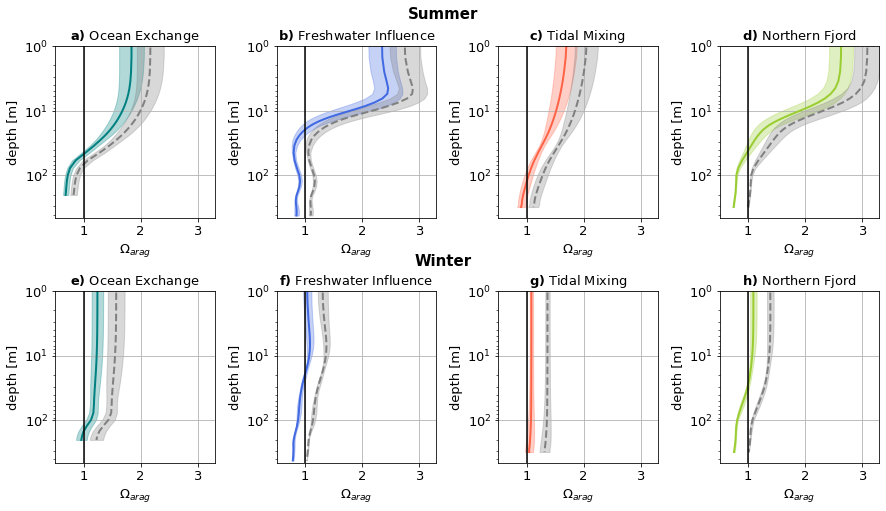

In [20]:
fact = 0.5
fs = 13

plt.rcParams.update({'font.size': 13})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 13}


mesh = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
depths = mesh['gdept_1d'][:]
zdepth = depths[0]

#fig = plt.figure(figsize=(19*(.55)/2.54, (23/3)/2.54), dpi = 300)

fig, axs = plt.subplots(2,4, figsize=(25*fact, 14*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
plt.subplots_adjust(hspace=0.55)

tmean = np.nanmean(BR3_jdf_summer,axis = 1)
tstd = np.nanstd(BR3_jdf_summer,axis = 1)
tmax = np.nanmax(BR3_jdf_summer,axis = 1)
tmin = np.nanmin(BR3_jdf_summer,axis = 1)
axs[0].plot(tmean,zdepth, linestyle = '-', linewidth = 2, color = jdf_col)
axs[0].fill_betweenx(zdepth,tmean-tstd,tmean+tstd, color = jdf_col, alpha = 0.3)
# axs[0].fill_betweenx(zdepth,tmin,tmax, color = jdf_col, alpha = 0.1)

tmean = np.nanmean(PI9_jdf_summer,axis = 1)
tstd = np.nanstd(PI9_jdf_summer,axis = 1)
tmax = np.nanmax(PI9_jdf_summer,axis = 1)
tmin = np.nanmin(PI9_jdf_summer,axis = 1)
axs[0].plot(tmean,zdepth, linestyle = '--', linewidth = 2, color = 'grey')
axs[0].fill_betweenx(zdepth,tmean-tstd,tmean+tstd, color = 'grey', alpha = 0.3)

##########
tmean = np.nanmean(BR3_cs_summer,axis = 1)
tstd = np.nanstd(BR3_cs_summer,axis = 1)
tmax = np.nanmax(BR3_cs_summer,axis = 1)
tmin = np.nanmin(BR3_cs_summer,axis = 1)
axs[1].plot(tmean,zdepth, linestyle = '-', linewidth = 2, color = cs_col)
axs[1].fill_betweenx(zdepth,tmean-tstd,tmean+tstd, color = cs_col, alpha = 0.3)
# axs[1].fill_betweenx(zdepth,tmin,tmax, color = cs_col, alpha = 0.1)

tmean = np.nanmean(PI9_cs_summer,axis = 1)
tstd = np.nanstd(PI9_cs_summer,axis = 1)
tmax = np.nanmax(PI9_cs_summer,axis = 1)
tmin = np.nanmin(PI9_cs_summer,axis = 1)
axs[1].plot(tmean,zdepth, linestyle = '--', linewidth = 2, color = 'grey')
axs[1].fill_betweenx(zdepth,tmean-tstd,tmean+tstd, color = 'grey', alpha = 0.3)

#######
tmean = np.nanmean(BR3_haro_summer,axis = 1)
tstd = np.nanstd(BR3_haro_summer,axis = 1)
tmax = np.nanmax(BR3_haro_summer,axis = 1)
tmin = np.nanmin(BR3_haro_summer,axis = 1)
axs[2].plot(tmean,zdepth, linestyle = '-', linewidth = 2, color = haro_col)
axs[2].fill_betweenx(zdepth,tmean-tstd,tmean+tstd, color = haro_col, alpha = 0.3)
# axs[2].fill_betweenx(zdepth,tmin,tmax, color = haro_col, alpha = 0.1)

tmean = np.nanmean(PI9_haro_summer,axis = 1)
tstd = np.nanstd(PI9_haro_summer,axis = 1)
tmax = np.nanmax(PI9_haro_summer,axis = 1)
tmin = np.nanmin(PI9_haro_summer,axis = 1)
axs[2].plot(tmean,zdepth, linestyle = '--', linewidth = 2, color = 'grey')
axs[2].fill_betweenx(zdepth,tmean-tstd,tmean+tstd, color = 'grey', alpha = 0.3)
######
tmean = np.nanmean(BR3_ns2_summer,axis = 1)
tstd = np.nanstd(BR3_ns2_summer,axis = 1)
tmax = np.nanmax(BR3_ns2_summer,axis = 1)
tmin = np.nanmin(BR3_ns2_summer,axis = 1)
axs[3].plot(tmean,zdepth, linestyle = '-', linewidth = 2, color = ns2_col)
axs[3].fill_betweenx(zdepth,tmean-tstd,tmean+tstd, color = ns2_col, alpha = 0.3)
# axs[3].fill_betweenx(zdepth,tmin,tmax, color = ns2_col, alpha = 0.1)

tmean = np.nanmean(PI9_ns2_summer,axis = 1)
tstd = np.nanstd(PI9_ns2_summer,axis = 1)
tmax = np.nanmax(PI9_ns2_summer,axis = 1)
tmin = np.nanmin(PI9_ns2_summer,axis = 1)
axs[3].plot(tmean,zdepth, linestyle = '--', linewidth = 2, color = 'grey')
axs[3].fill_betweenx(zdepth,tmean-tstd,tmean+tstd, color = 'grey', alpha = 0.3)

####
tmean = np.nanmean(BR3_jdf_winter,axis = 1)
tstd = np.nanstd(BR3_jdf_winter,axis = 1)
tmax = np.nanmax(BR3_jdf_winter,axis = 1)
tmin = np.nanmin(BR3_jdf_winter,axis = 1)
axs[4].plot(tmean,zdepth, linestyle = '-', linewidth = 2, color = jdf_col)
axs[4].fill_betweenx(zdepth,tmean-tstd,tmean+tstd, color = jdf_col, alpha = 0.3)
# axs[4].fill_betweenx(zdepth,tmin,tmax, color = jdf_col, alpha = 0.1)

tmean = np.nanmean(PI9_jdf_winter,axis = 1)
tstd = np.nanstd(PI9_jdf_winter,axis = 1)
tmax = np.nanmax(PI9_jdf_winter,axis = 1)
tmin = np.nanmin(PI9_jdf_winter,axis = 1)
axs[4].plot(tmean,zdepth, linestyle = '--', linewidth = 2, color = 'grey')
axs[4].fill_betweenx(zdepth,tmean-tstd,tmean+tstd, color = 'grey', alpha = 0.3)

##########
tmean = np.nanmean(BR3_cs_winter,axis = 1)
tstd = np.nanstd(BR3_cs_winter,axis = 1)
tmax = np.nanmax(BR3_cs_winter,axis = 1)
tmin = np.nanmin(BR3_cs_winter,axis = 1)
axs[5].plot(tmean,zdepth, linestyle = '-', linewidth = 2, color = cs_col)
axs[5].fill_betweenx(zdepth,tmean-tstd,tmean+tstd, color = cs_col, alpha = 0.3)
# axs[5].fill_betweenx(zdepth,tmin,tmax, color = cs_col, alpha = 0.1)

tmean = np.nanmean(PI9_cs_winter,axis = 1)
tstd = np.nanstd(PI9_cs_winter,axis = 1)
tmax = np.nanmax(PI9_cs_winter,axis = 1)
tmin = np.nanmin(PI9_cs_winter,axis = 1)
axs[5].plot(tmean,zdepth, linestyle = '--', linewidth = 2, color = 'grey')
axs[5].fill_betweenx(zdepth,tmean-tstd,tmean+tstd, color = 'grey', alpha = 0.3)

#######
tmean = np.nanmean(BR3_haro_winter,axis = 1)
tstd = np.nanstd(BR3_haro_winter,axis = 1)
tmax = np.nanmax(BR3_haro_winter,axis = 1)
tmin = np.nanmin(BR3_haro_winter,axis = 1)
axs[6].plot(tmean,zdepth, linestyle = '-', linewidth = 2, color = haro_col)
axs[6].fill_betweenx(zdepth,tmean-tstd,tmean+tstd, color = haro_col, alpha = 0.3)
# axs[6].fill_betweenx(zdepth,tmin,tmax, color = haro_col, alpha = 0.1)

tmean = np.nanmean(PI9_haro_winter,axis = 1)
tstd = np.nanstd(PI9_haro_winter,axis = 1)
tmax = np.nanmax(PI9_haro_winter,axis = 1)
tmin = np.nanmin(PI9_haro_winter,axis = 1)
axs[6].plot(tmean,zdepth, linestyle = '--', linewidth = 2, color = 'grey')
axs[6].fill_betweenx(zdepth,tmean-tstd,tmean+tstd, color = 'grey', alpha = 0.3)
######
tmean = np.nanmean(BR3_ns2_winter,axis = 1)
tstd = np.nanstd(BR3_ns2_winter,axis = 1)
tmax = np.nanmax(BR3_ns2_winter,axis = 1)
tmin = np.nanmin(BR3_ns2_winter,axis = 1)
axs[7].plot(tmean,zdepth, linestyle = '-', linewidth = 2, color = ns2_col)
axs[7].fill_betweenx(zdepth,tmean-tstd,tmean+tstd, color = ns2_col, alpha = 0.3)
# axs[7].fill_betweenx(zdepth,tmin,tmax, color = ns2_col, alpha = 0.1)

tmean = np.nanmean(PI9_ns2_winter,axis = 1)
tstd = np.nanstd(PI9_ns2_winter,axis = 1)
tmax = np.nanmax(PI9_ns2_winter,axis = 1)
tmin = np.nanmin(PI9_ns2_winter,axis = 1)
axs[7].plot(tmean,zdepth, linestyle = '--', linewidth = 2, color = 'grey')
axs[7].fill_betweenx(zdepth,tmean-tstd,tmean+tstd, color = 'grey', alpha = 0.3)



for i in range(0,8):
    
    axs[i].axvline(x=1, color = 'k', linestyle = '-')
    axs[i].set_yscale('log')
    axs[i].set_xlim([0.5,3.3])
    axs[i].set_ylim([1,450])
    
    axs[i].invert_yaxis()
    axs[i].set_xlabel('$\Omega_{arag}$', fontsize = fs)
    axs[i].set_ylabel('depth [m]', fontsize = fs)
    axs[i].grid()
    
    #ax6.set_title(r'$\bf{f)}$ $\Omega_{arag}$ distribution', fontsize = 8)
    axs[0].set_title(r'$\bf{a)}$ Ocean Exchange', fontsize = fs);axs[4].set_title(r'$\bf{e)}$ Ocean Exchange', fontsize = fs)
    axs[1].set_title(r'$\bf{b)}$ Freshwater Influence', fontsize = fs);axs[5].set_title(r'$\bf{f)}$ Freshwater Influence', fontsize = fs)
    axs[2].set_title(r'$\bf{c)}$ Tidal Mixing', fontsize = fs);axs[6].set_title(r'$\bf{g)}$ Tidal Mixing', fontsize = fs)
    axs[3].set_title(r'$\bf{d)}$ Northern Fjord', fontsize = fs);axs[7].set_title(r'$\bf{h)}$ Northern Fjord', fontsize = fs)
    
plt.tight_layout()
fig.text(0.5, 0.99, 'Summer', fontsize = fs+2, fontweight = 'bold', ha = 'center')
fig.text(0.5, 0.50, 'Winter', fontsize = fs+2, fontweight = 'bold', ha = 'center')


fig.savefig('./CG_FIGS/FIG_CG_06_spatiotemp.jpg', bbox_inches='tight', dpi = 300)



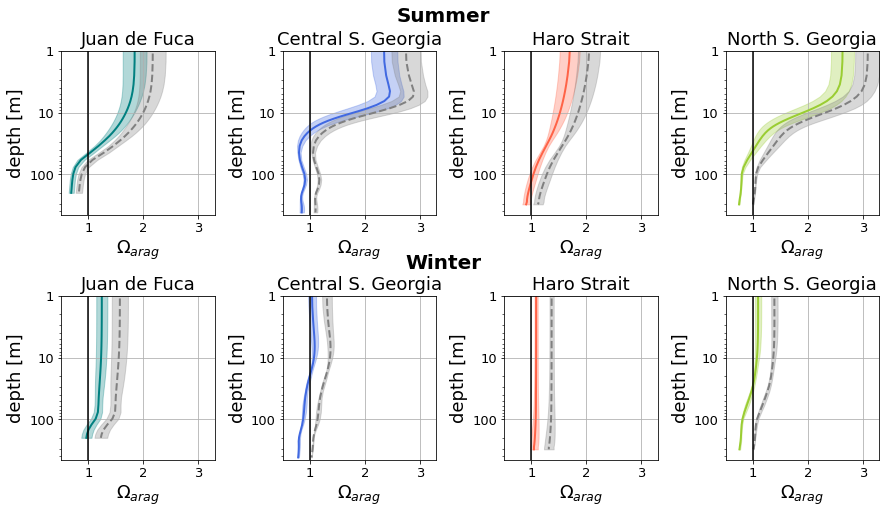

In [26]:
fact = 0.5
fs = 18

plt.rcParams.update({'font.size': 13})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 13}


mesh = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
depths = mesh['gdept_1d'][:]
zdepth = depths[0]

#fig = plt.figure(figsize=(19*(.55)/2.54, (23/3)/2.54), dpi = 300)

fig, axs = plt.subplots(2,4, figsize=(25*fact, 14*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
plt.subplots_adjust(hspace=0.55)

tmean = np.nanmean(BR3_jdf_summer,axis = 1)
tstd = np.nanstd(BR3_jdf_summer,axis = 1)
tmax = np.nanmax(BR3_jdf_summer,axis = 1)
tmin = np.nanmin(BR3_jdf_summer,axis = 1)
axs[0].plot(tmean,zdepth, linestyle = '-', linewidth = 2, color = jdf_col)
axs[0].fill_betweenx(zdepth,tmean-tstd,tmean+tstd, color = jdf_col, alpha = 0.3)
# axs[0].fill_betweenx(zdepth,tmin,tmax, color = jdf_col, alpha = 0.1)

tmean = np.nanmean(PI9_jdf_summer,axis = 1)
tstd = np.nanstd(PI9_jdf_summer,axis = 1)
tmax = np.nanmax(PI9_jdf_summer,axis = 1)
tmin = np.nanmin(PI9_jdf_summer,axis = 1)
axs[0].plot(tmean,zdepth, linestyle = '--', linewidth = 2, color = 'grey')
axs[0].fill_betweenx(zdepth,tmean-tstd,tmean+tstd, color = 'grey', alpha = 0.3)

##########
tmean = np.nanmean(BR3_cs_summer,axis = 1)
tstd = np.nanstd(BR3_cs_summer,axis = 1)
tmax = np.nanmax(BR3_cs_summer,axis = 1)
tmin = np.nanmin(BR3_cs_summer,axis = 1)
axs[1].plot(tmean,zdepth, linestyle = '-', linewidth = 2, color = cs_col)
axs[1].fill_betweenx(zdepth,tmean-tstd,tmean+tstd, color = cs_col, alpha = 0.3)
# axs[1].fill_betweenx(zdepth,tmin,tmax, color = cs_col, alpha = 0.1)

tmean = np.nanmean(PI9_cs_summer,axis = 1)
tstd = np.nanstd(PI9_cs_summer,axis = 1)
tmax = np.nanmax(PI9_cs_summer,axis = 1)
tmin = np.nanmin(PI9_cs_summer,axis = 1)
axs[1].plot(tmean,zdepth, linestyle = '--', linewidth = 2, color = 'grey')
axs[1].fill_betweenx(zdepth,tmean-tstd,tmean+tstd, color = 'grey', alpha = 0.3)

#######
tmean = np.nanmean(BR3_haro_summer,axis = 1)
tstd = np.nanstd(BR3_haro_summer,axis = 1)
tmax = np.nanmax(BR3_haro_summer,axis = 1)
tmin = np.nanmin(BR3_haro_summer,axis = 1)
axs[2].plot(tmean,zdepth, linestyle = '-', linewidth = 2, color = haro_col)
axs[2].fill_betweenx(zdepth,tmean-tstd,tmean+tstd, color = haro_col, alpha = 0.3)
# axs[2].fill_betweenx(zdepth,tmin,tmax, color = haro_col, alpha = 0.1)

tmean = np.nanmean(PI9_haro_summer,axis = 1)
tstd = np.nanstd(PI9_haro_summer,axis = 1)
tmax = np.nanmax(PI9_haro_summer,axis = 1)
tmin = np.nanmin(PI9_haro_summer,axis = 1)
axs[2].plot(tmean,zdepth, linestyle = '--', linewidth = 2, color = 'grey')
axs[2].fill_betweenx(zdepth,tmean-tstd,tmean+tstd, color = 'grey', alpha = 0.3)
######
tmean = np.nanmean(BR3_ns2_summer,axis = 1)
tstd = np.nanstd(BR3_ns2_summer,axis = 1)
tmax = np.nanmax(BR3_ns2_summer,axis = 1)
tmin = np.nanmin(BR3_ns2_summer,axis = 1)
axs[3].plot(tmean,zdepth, linestyle = '-', linewidth = 2, color = ns2_col)
axs[3].fill_betweenx(zdepth,tmean-tstd,tmean+tstd, color = ns2_col, alpha = 0.3)
# axs[3].fill_betweenx(zdepth,tmin,tmax, color = ns2_col, alpha = 0.1)

tmean = np.nanmean(PI9_ns2_summer,axis = 1)
tstd = np.nanstd(PI9_ns2_summer,axis = 1)
tmax = np.nanmax(PI9_ns2_summer,axis = 1)
tmin = np.nanmin(PI9_ns2_summer,axis = 1)
axs[3].plot(tmean,zdepth, linestyle = '--', linewidth = 2, color = 'grey')
axs[3].fill_betweenx(zdepth,tmean-tstd,tmean+tstd, color = 'grey', alpha = 0.3)

####
tmean = np.nanmean(BR3_jdf_winter,axis = 1)
tstd = np.nanstd(BR3_jdf_winter,axis = 1)
tmax = np.nanmax(BR3_jdf_winter,axis = 1)
tmin = np.nanmin(BR3_jdf_winter,axis = 1)
axs[4].plot(tmean,zdepth, linestyle = '-', linewidth = 2, color = jdf_col)
axs[4].fill_betweenx(zdepth,tmean-tstd,tmean+tstd, color = jdf_col, alpha = 0.3)
# axs[4].fill_betweenx(zdepth,tmin,tmax, color = jdf_col, alpha = 0.1)

tmean = np.nanmean(PI9_jdf_winter,axis = 1)
tstd = np.nanstd(PI9_jdf_winter,axis = 1)
tmax = np.nanmax(PI9_jdf_winter,axis = 1)
tmin = np.nanmin(PI9_jdf_winter,axis = 1)
axs[4].plot(tmean,zdepth, linestyle = '--', linewidth = 2, color = 'grey')
axs[4].fill_betweenx(zdepth,tmean-tstd,tmean+tstd, color = 'grey', alpha = 0.3)

##########
tmean = np.nanmean(BR3_cs_winter,axis = 1)
tstd = np.nanstd(BR3_cs_winter,axis = 1)
tmax = np.nanmax(BR3_cs_winter,axis = 1)
tmin = np.nanmin(BR3_cs_winter,axis = 1)
axs[5].plot(tmean,zdepth, linestyle = '-', linewidth = 2, color = cs_col)
axs[5].fill_betweenx(zdepth,tmean-tstd,tmean+tstd, color = cs_col, alpha = 0.3)
# axs[5].fill_betweenx(zdepth,tmin,tmax, color = cs_col, alpha = 0.1)

tmean = np.nanmean(PI9_cs_winter,axis = 1)
tstd = np.nanstd(PI9_cs_winter,axis = 1)
tmax = np.nanmax(PI9_cs_winter,axis = 1)
tmin = np.nanmin(PI9_cs_winter,axis = 1)
axs[5].plot(tmean,zdepth, linestyle = '--', linewidth = 2, color = 'grey')
axs[5].fill_betweenx(zdepth,tmean-tstd,tmean+tstd, color = 'grey', alpha = 0.3)

#######
tmean = np.nanmean(BR3_haro_winter,axis = 1)
tstd = np.nanstd(BR3_haro_winter,axis = 1)
tmax = np.nanmax(BR3_haro_winter,axis = 1)
tmin = np.nanmin(BR3_haro_winter,axis = 1)
axs[6].plot(tmean,zdepth, linestyle = '-', linewidth = 2, color = haro_col)
axs[6].fill_betweenx(zdepth,tmean-tstd,tmean+tstd, color = haro_col, alpha = 0.3)
# axs[6].fill_betweenx(zdepth,tmin,tmax, color = haro_col, alpha = 0.1)

tmean = np.nanmean(PI9_haro_winter,axis = 1)
tstd = np.nanstd(PI9_haro_winter,axis = 1)
tmax = np.nanmax(PI9_haro_winter,axis = 1)
tmin = np.nanmin(PI9_haro_winter,axis = 1)
axs[6].plot(tmean,zdepth, linestyle = '--', linewidth = 2, color = 'grey')
axs[6].fill_betweenx(zdepth,tmean-tstd,tmean+tstd, color = 'grey', alpha = 0.3)
######
tmean = np.nanmean(BR3_ns2_winter,axis = 1)
tstd = np.nanstd(BR3_ns2_winter,axis = 1)
tmax = np.nanmax(BR3_ns2_winter,axis = 1)
tmin = np.nanmin(BR3_ns2_winter,axis = 1)
axs[7].plot(tmean,zdepth, linestyle = '-', linewidth = 2, color = ns2_col)
axs[7].fill_betweenx(zdepth,tmean-tstd,tmean+tstd, color = ns2_col, alpha = 0.3)
# axs[7].fill_betweenx(zdepth,tmin,tmax, color = ns2_col, alpha = 0.1)

tmean = np.nanmean(PI9_ns2_winter,axis = 1)
tstd = np.nanstd(PI9_ns2_winter,axis = 1)
tmax = np.nanmax(PI9_ns2_winter,axis = 1)
tmin = np.nanmin(PI9_ns2_winter,axis = 1)
axs[7].plot(tmean,zdepth, linestyle = '--', linewidth = 2, color = 'grey')
axs[7].fill_betweenx(zdepth,tmean-tstd,tmean+tstd, color = 'grey', alpha = 0.3)



for i in range(0,8):
    
    axs[i].axvline(x=1, color = 'k', linestyle = '-')
    axs[i].set_yscale('log')
    axs[i].set_xlim([0.5,3.3])
    axs[i].set_ylim([1,450])
    
    axs[i].invert_yaxis()
    axs[i].yaxis.set_major_formatter(mticker.ScalarFormatter())
    axs[i].set_xlabel('$\Omega_{arag}$', fontsize = fs)
    axs[i].set_ylabel('depth [m]', fontsize = fs)
    axs[i].grid()
    
    #ax6.set_title(r'$\bf{f)}$ $\Omega_{arag}$ distribution', fontsize = 8)
    axs[0].set_title('Juan de Fuca', fontsize = fs);axs[4].set_title('Juan de Fuca', fontsize = fs)
    axs[1].set_title('Central S. Georgia', fontsize = fs);axs[5].set_title('Central S. Georgia', fontsize = fs)
    axs[2].set_title('Haro Strait', fontsize = fs);axs[6].set_title('Haro Strait', fontsize = fs)
    axs[3].set_title('North S. Georgia', fontsize = fs);axs[7].set_title('North S. Georgia', fontsize = fs)
    
plt.tight_layout()
fig.text(0.5, 0.99, 'Summer', fontsize = fs+2, fontweight = 'bold', ha = 'center')
fig.text(0.5, 0.50, 'Winter', fontsize = fs+2, fontweight = 'bold', ha = 'center')


fig.savefig('./CG_FIGS/poster_fig8.jpg', bbox_inches='tight', dpi = 300)



Text(0.5, 0.5, 'Winter')

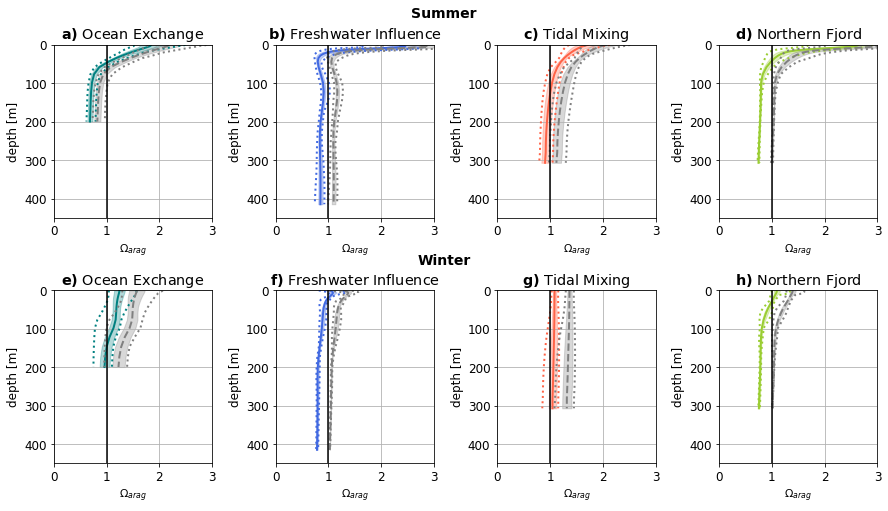

In [22]:
fact = 0.5
fs = 12

plt.rcParams.update({'font.size': 12})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 12}


mesh = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
depths = mesh['gdept_1d'][:]
zdepth = depths[0]

#fig = plt.figure(figsize=(19*(.55)/2.54, (23/3)/2.54), dpi = 300)

fig, axs = plt.subplots(2,4, figsize=(25*fact, 14*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
plt.subplots_adjust(hspace=0.55)

tmean = np.nanmean(BR3_jdf_summer,axis = 1)
tstd = np.nanstd(BR3_jdf_summer,axis = 1)
tmax = np.nanmax(BR3_jdf_summer,axis = 1)
tmin = np.nanmin(BR3_jdf_summer,axis = 1)
axs[0].plot(tmean,zdepth, linestyle = '-', linewidth = 2, color = jdf_col)
axs[0].fill_betweenx(zdepth,tmean-tstd,tmean+tstd, color = jdf_col, alpha = 0.3)
axs[0].plot(tmin,zdepth,linestyle = ':', linewidth = 2, color = jdf_col)
axs[0].plot(tmax,zdepth,linestyle = ':', linewidth = 2, color = jdf_col)
# axs[0].fill_betweenx(zdepth,tmin,tmax, color = jdf_col, alpha = 0.1)

tmean = np.nanmean(PI9_jdf_summer,axis = 1)
tstd = np.nanstd(PI9_jdf_summer,axis = 1)
tmax = np.nanmax(PI9_jdf_summer,axis = 1)
tmin = np.nanmin(PI9_jdf_summer,axis = 1)
axs[0].plot(tmean,zdepth, linestyle = '--', linewidth = 2, color = 'grey')
axs[0].fill_betweenx(zdepth,tmean-tstd,tmean+tstd, color = 'grey', alpha = 0.3)
axs[0].plot(tmin,zdepth,linestyle = ':', linewidth = 2, color = 'grey')
axs[0].plot(tmax,zdepth,linestyle = ':', linewidth = 2, color = 'grey')

##########
tmean = np.nanmean(BR3_cs_summer,axis = 1)
tstd = np.nanstd(BR3_cs_summer,axis = 1)
tmax = np.nanmax(BR3_cs_summer,axis = 1)
tmin = np.nanmin(BR3_cs_summer,axis = 1)
axs[1].plot(tmean,zdepth, linestyle = '-', linewidth = 2, color = cs_col)
axs[1].fill_betweenx(zdepth,tmean-tstd,tmean+tstd, color = cs_col, alpha = 0.3)
axs[1].plot(tmin,zdepth,linestyle = ':', linewidth = 2, color = cs_col)
axs[1].plot(tmax,zdepth,linestyle = ':', linewidth = 2, color = cs_col)
# axs[1].fill_betweenx(zdepth,tmin,tmax, color = cs_col, alpha = 0.1)

tmean = np.nanmean(PI9_cs_summer,axis = 1)
tstd = np.nanstd(PI9_cs_summer,axis = 1)
tmax = np.nanmax(PI9_cs_summer,axis = 1)
tmin = np.nanmin(PI9_cs_summer,axis = 1)
axs[1].plot(tmean,zdepth, linestyle = '--', linewidth = 2, color = 'grey')
axs[1].fill_betweenx(zdepth,tmean-tstd,tmean+tstd, color = 'grey', alpha = 0.3)
axs[1].plot(tmin,zdepth,linestyle = ':', linewidth = 2, color = 'grey')
axs[1].plot(tmax,zdepth,linestyle = ':', linewidth = 2, color = 'grey')

#######
tmean = np.nanmean(BR3_haro_summer,axis = 1)
tstd = np.nanstd(BR3_haro_summer,axis = 1)
tmax = np.nanmax(BR3_haro_summer,axis = 1)
tmin = np.nanmin(BR3_haro_summer,axis = 1)
axs[2].plot(tmean,zdepth, linestyle = '-', linewidth = 2, color = haro_col)
axs[2].fill_betweenx(zdepth,tmean-tstd,tmean+tstd, color = haro_col, alpha = 0.3)
axs[2].plot(tmin,zdepth,linestyle = ':', linewidth = 2, color = haro_col)
axs[2].plot(tmax,zdepth,linestyle = ':', linewidth = 2, color = haro_col)
# axs[2].fill_betweenx(zdepth,tmin,tmax, color = haro_col, alpha = 0.1)

tmean = np.nanmean(PI9_haro_summer,axis = 1)
tstd = np.nanstd(PI9_haro_summer,axis = 1)
tmax = np.nanmax(PI9_haro_summer,axis = 1)
tmin = np.nanmin(PI9_haro_summer,axis = 1)
axs[2].plot(tmean,zdepth, linestyle = '--', linewidth = 2, color = 'grey')
axs[2].fill_betweenx(zdepth,tmean-tstd,tmean+tstd, color = 'grey', alpha = 0.3)
axs[2].plot(tmin,zdepth,linestyle = ':', linewidth = 2, color = 'grey')
axs[2].plot(tmax,zdepth,linestyle = ':', linewidth = 2, color = 'grey')
######
tmean = np.nanmean(BR3_ns2_summer,axis = 1)
tstd = np.nanstd(BR3_ns2_summer,axis = 1)
tmax = np.nanmax(BR3_ns2_summer,axis = 1)
tmin = np.nanmin(BR3_ns2_summer,axis = 1)
axs[3].plot(tmean,zdepth, linestyle = '-', linewidth = 2, color = ns2_col)
axs[3].fill_betweenx(zdepth,tmean-tstd,tmean+tstd, color = ns2_col, alpha = 0.3)
axs[3].plot(tmin,zdepth,linestyle = ':', linewidth = 2, color = ns2_col)
axs[3].plot(tmax,zdepth,linestyle = ':', linewidth = 2, color = ns2_col)
# axs[3].fill_betweenx(zdepth,tmin,tmax, color = ns2_col, alpha = 0.1)

tmean = np.nanmean(PI9_ns2_summer,axis = 1)
tstd = np.nanstd(PI9_ns2_summer,axis = 1)
tmax = np.nanmax(PI9_ns2_summer,axis = 1)
tmin = np.nanmin(PI9_ns2_summer,axis = 1)
axs[3].plot(tmean,zdepth, linestyle = '--', linewidth = 2, color = 'grey')
axs[3].fill_betweenx(zdepth,tmean-tstd,tmean+tstd, color = 'grey', alpha = 0.3)
axs[3].plot(tmin,zdepth,linestyle = ':', linewidth = 2, color = 'grey')
axs[3].plot(tmax,zdepth,linestyle = ':', linewidth = 2, color = 'grey')

###########
tmean = np.nanmean(BR3_jdf_winter,axis = 1)
tstd = np.nanstd(BR3_jdf_winter,axis = 1)
tmax = np.nanmax(BR3_jdf_winter,axis = 1)
tmin = np.nanmin(BR3_jdf_winter,axis = 1)
axs[4].plot(tmean,zdepth, linestyle = '-', linewidth = 2, color = jdf_col)
axs[4].fill_betweenx(zdepth,tmean-tstd,tmean+tstd, color = jdf_col, alpha = 0.3)
axs[4].plot(tmin,zdepth,linestyle = ':', linewidth = 2, color = jdf_col)
axs[4].plot(tmax,zdepth,linestyle = ':', linewidth = 2, color = jdf_col)
# axs[4].fill_betweenx(zdepth,tmin,tmax, color = jdf_col, alpha = 0.1)

tmean = np.nanmean(PI9_jdf_winter,axis = 1)
tstd = np.nanstd(PI9_jdf_winter,axis = 1)
tmax = np.nanmax(PI9_jdf_winter,axis = 1)
tmin = np.nanmin(PI9_jdf_winter,axis = 1)
axs[4].plot(tmean,zdepth, linestyle = '--', linewidth = 2, color = 'grey')
axs[4].fill_betweenx(zdepth,tmean-tstd,tmean+tstd, color = 'grey', alpha = 0.3)
axs[4].plot(tmin,zdepth,linestyle = ':', linewidth = 2, color = 'grey')
axs[4].plot(tmax,zdepth,linestyle = ':', linewidth = 2, color = 'grey')

##########
tmean = np.nanmean(BR3_cs_winter,axis = 1)
tstd = np.nanstd(BR3_cs_winter,axis = 1)
tmax = np.nanmax(BR3_cs_winter,axis = 1)
tmin = np.nanmin(BR3_cs_winter,axis = 1)
axs[5].plot(tmean,zdepth, linestyle = '-', linewidth = 2, color = cs_col)
axs[5].fill_betweenx(zdepth,tmean-tstd,tmean+tstd, color = cs_col, alpha = 0.3)
axs[5].plot(tmin,zdepth,linestyle = ':', linewidth = 2, color = cs_col)
axs[5].plot(tmax,zdepth,linestyle = ':', linewidth = 2, color = cs_col)
# axs[5].fill_betweenx(zdepth,tmin,tmax, color = cs_col, alpha = 0.1)

tmean = np.nanmean(PI9_cs_winter,axis = 1)
tstd = np.nanstd(PI9_cs_winter,axis = 1)
tmax = np.nanmax(PI9_cs_winter,axis = 1)
tmin = np.nanmin(PI9_cs_winter,axis = 1)
axs[5].plot(tmean,zdepth, linestyle = '--', linewidth = 2, color = 'grey')
axs[5].fill_betweenx(zdepth,tmean-tstd,tmean+tstd, color = 'grey', alpha = 0.3)
axs[5].plot(tmin,zdepth,linestyle = ':', linewidth = 2, color = 'grey')
axs[5].plot(tmax,zdepth,linestyle = ':', linewidth = 2, color = 'grey')

#######
tmean = np.nanmean(BR3_haro_winter,axis = 1)
tstd = np.nanstd(BR3_haro_winter,axis = 1)
tmax = np.nanmax(BR3_haro_winter,axis = 1)
tmin = np.nanmin(BR3_haro_winter,axis = 1)
axs[6].plot(tmean,zdepth, linestyle = '-', linewidth = 2, color = haro_col)
axs[6].fill_betweenx(zdepth,tmean-tstd,tmean+tstd, color = haro_col, alpha = 0.3)
axs[6].plot(tmin,zdepth,linestyle = ':', linewidth = 2, color = haro_col)
axs[6].plot(tmax,zdepth,linestyle = ':', linewidth = 2, color = haro_col)
# axs[6].fill_betweenx(zdepth,tmin,tmax, color = haro_col, alpha = 0.1)

tmean = np.nanmean(PI9_haro_winter,axis = 1)
tstd = np.nanstd(PI9_haro_winter,axis = 1)
tmax = np.nanmax(PI9_haro_winter,axis = 1)
tmin = np.nanmin(PI9_haro_winter,axis = 1)
axs[6].plot(tmean,zdepth, linestyle = '--', linewidth = 2, color = 'grey')
axs[6].fill_betweenx(zdepth,tmean-tstd,tmean+tstd, color = 'grey', alpha = 0.3)
axs[6].plot(tmin,zdepth,linestyle = ':', linewidth = 2, color = 'grey')
axs[6].plot(tmax,zdepth,linestyle = ':', linewidth = 2, color = 'grey')
######
tmean = np.nanmean(BR3_ns2_winter,axis = 1)
tstd = np.nanstd(BR3_ns2_winter,axis = 1)
tmax = np.nanmax(BR3_ns2_winter,axis = 1)
tmin = np.nanmin(BR3_ns2_winter,axis = 1)
axs[7].plot(tmean,zdepth, linestyle = '-', linewidth = 2, color = ns2_col)
axs[7].fill_betweenx(zdepth,tmean-tstd,tmean+tstd, color = ns2_col, alpha = 0.3)
axs[7].plot(tmin,zdepth,linestyle = ':', linewidth = 2, color = ns2_col)
axs[7].plot(tmax,zdepth,linestyle = ':', linewidth = 2, color = ns2_col)
# axs[7].fill_betweenx(zdepth,tmin,tmax, color = ns2_col, alpha = 0.1)

tmean = np.nanmean(PI9_ns2_winter,axis = 1)
tstd = np.nanstd(PI9_ns2_winter,axis = 1)
tmax = np.nanmax(PI9_ns2_winter,axis = 1)
tmin = np.nanmin(PI9_ns2_winter,axis = 1)
axs[7].plot(tmean,zdepth, linestyle = '--', linewidth = 2, color = 'grey')
axs[7].fill_betweenx(zdepth,tmean-tstd,tmean+tstd, color = 'grey', alpha = 0.3)
axs[7].plot(tmin,zdepth,linestyle = ':', linewidth = 2, color = 'grey')
axs[7].plot(tmax,zdepth,linestyle = ':', linewidth = 2, color = 'grey')


for i in range(0,8):
    
    axs[i].axvline(x=1, color = 'k', linestyle = '-')
    axs[i].set_xlim([0,3])
    axs[i].set_ylim([0,450])
    axs[i].invert_yaxis()
    axs[i].set_xlabel('$\Omega_{arag}$', fontsize = 11)
    axs[i].set_ylabel('depth [m]')
    axs[i].grid()
    
    #ax6.set_title(r'$\bf{f)}$ $\Omega_{arag}$ distribution', fontsize = 8)
    axs[0].set_title(r'$\bf{a)}$ Ocean Exchange');axs[4].set_title(r'$\bf{e)}$ Ocean Exchange')
    axs[1].set_title(r'$\bf{b)}$ Freshwater Influence');axs[5].set_title(r'$\bf{f)}$ Freshwater Influence')
    axs[2].set_title(r'$\bf{c)}$ Tidal Mixing');axs[6].set_title(r'$\bf{g)}$ Tidal Mixing')
    axs[3].set_title(r'$\bf{d)}$ Northern Fjord');axs[7].set_title(r'$\bf{h)}$ Northern Fjord')
    
plt.tight_layout()
fig.text(0.5, 0.99, 'Summer', fontsize = fs+2, fontweight = 'bold', ha = 'center')
fig.text(0.5, 0.50, 'Winter', fontsize = fs+2, fontweight = 'bold', ha = 'center')


#fig.savefig('./CG_FIGS/FIG_CG_06_spatiotemp.jpg', bbox_inches='tight', dpi = 300)



Text(0.5, 0.5, 'Winter')

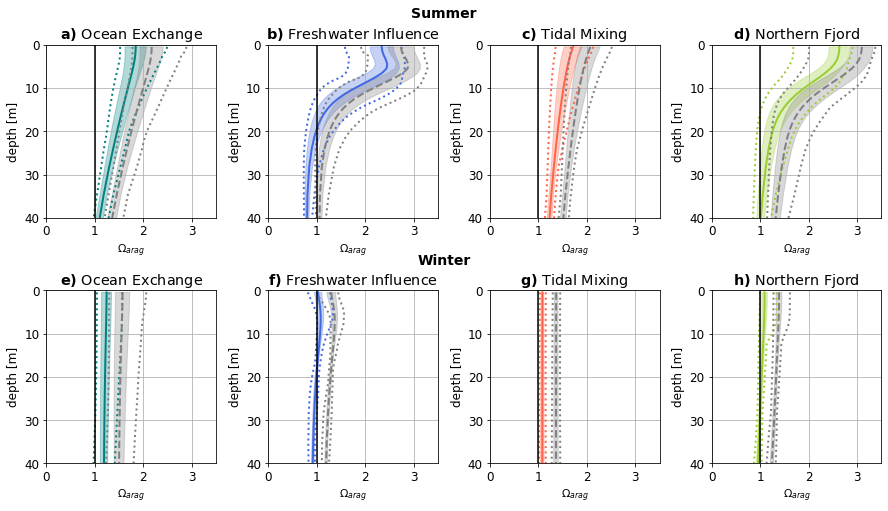

In [23]:
fact = 0.5
fs = 12

plt.rcParams.update({'font.size': 12})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 12}


mesh = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
depths = mesh['gdept_1d'][:]
zdepth = depths[0]

#fig = plt.figure(figsize=(19*(.55)/2.54, (23/3)/2.54), dpi = 300)

fig, axs = plt.subplots(2,4, figsize=(25*fact, 14*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
plt.subplots_adjust(hspace=0.55)

tmean = np.nanmean(BR3_jdf_summer,axis = 1)
tstd = np.nanstd(BR3_jdf_summer,axis = 1)
tmax = np.nanmax(BR3_jdf_summer,axis = 1)
tmin = np.nanmin(BR3_jdf_summer,axis = 1)
axs[0].plot(tmean,zdepth, linestyle = '-', linewidth = 2, color = jdf_col)
axs[0].fill_betweenx(zdepth,tmean-tstd,tmean+tstd, color = jdf_col, alpha = 0.3)
axs[0].plot(tmin,zdepth,linestyle = ':', linewidth = 2, color = jdf_col)
axs[0].plot(tmax,zdepth,linestyle = ':', linewidth = 2, color = jdf_col)
# axs[0].fill_betweenx(zdepth,tmin,tmax, color = jdf_col, alpha = 0.1)

tmean = np.nanmean(PI9_jdf_summer,axis = 1)
tstd = np.nanstd(PI9_jdf_summer,axis = 1)
tmax = np.nanmax(PI9_jdf_summer,axis = 1)
tmin = np.nanmin(PI9_jdf_summer,axis = 1)
axs[0].plot(tmean,zdepth, linestyle = '--', linewidth = 2, color = 'grey')
axs[0].fill_betweenx(zdepth,tmean-tstd,tmean+tstd, color = 'grey', alpha = 0.3)
axs[0].plot(tmin,zdepth,linestyle = ':', linewidth = 2, color = 'grey')
axs[0].plot(tmax,zdepth,linestyle = ':', linewidth = 2, color = 'grey')

##########
tmean = np.nanmean(BR3_cs_summer,axis = 1)
tstd = np.nanstd(BR3_cs_summer,axis = 1)
tmax = np.nanmax(BR3_cs_summer,axis = 1)
tmin = np.nanmin(BR3_cs_summer,axis = 1)
axs[1].plot(tmean,zdepth, linestyle = '-', linewidth = 2, color = cs_col)
axs[1].fill_betweenx(zdepth,tmean-tstd,tmean+tstd, color = cs_col, alpha = 0.3)
axs[1].plot(tmin,zdepth,linestyle = ':', linewidth = 2, color = cs_col)
axs[1].plot(tmax,zdepth,linestyle = ':', linewidth = 2, color = cs_col)
# axs[1].fill_betweenx(zdepth,tmin,tmax, color = cs_col, alpha = 0.1)

tmean = np.nanmean(PI9_cs_summer,axis = 1)
tstd = np.nanstd(PI9_cs_summer,axis = 1)
tmax = np.nanmax(PI9_cs_summer,axis = 1)
tmin = np.nanmin(PI9_cs_summer,axis = 1)
axs[1].plot(tmean,zdepth, linestyle = '--', linewidth = 2, color = 'grey')
axs[1].fill_betweenx(zdepth,tmean-tstd,tmean+tstd, color = 'grey', alpha = 0.3)
axs[1].plot(tmin,zdepth,linestyle = ':', linewidth = 2, color = 'grey')
axs[1].plot(tmax,zdepth,linestyle = ':', linewidth = 2, color = 'grey')

#######
tmean = np.nanmean(BR3_haro_summer,axis = 1)
tstd = np.nanstd(BR3_haro_summer,axis = 1)
tmax = np.nanmax(BR3_haro_summer,axis = 1)
tmin = np.nanmin(BR3_haro_summer,axis = 1)
axs[2].plot(tmean,zdepth, linestyle = '-', linewidth = 2, color = haro_col)
axs[2].fill_betweenx(zdepth,tmean-tstd,tmean+tstd, color = haro_col, alpha = 0.3)
axs[2].plot(tmin,zdepth,linestyle = ':', linewidth = 2, color = haro_col)
axs[2].plot(tmax,zdepth,linestyle = ':', linewidth = 2, color = haro_col)
# axs[2].fill_betweenx(zdepth,tmin,tmax, color = haro_col, alpha = 0.1)

tmean = np.nanmean(PI9_haro_summer,axis = 1)
tstd = np.nanstd(PI9_haro_summer,axis = 1)
tmax = np.nanmax(PI9_haro_summer,axis = 1)
tmin = np.nanmin(PI9_haro_summer,axis = 1)
axs[2].plot(tmean,zdepth, linestyle = '--', linewidth = 2, color = 'grey')
axs[2].fill_betweenx(zdepth,tmean-tstd,tmean+tstd, color = 'grey', alpha = 0.3)
axs[2].plot(tmin,zdepth,linestyle = ':', linewidth = 2, color = 'grey')
axs[2].plot(tmax,zdepth,linestyle = ':', linewidth = 2, color = 'grey')
######
tmean = np.nanmean(BR3_ns2_summer,axis = 1)
tstd = np.nanstd(BR3_ns2_summer,axis = 1)
tmax = np.nanmax(BR3_ns2_summer,axis = 1)
tmin = np.nanmin(BR3_ns2_summer,axis = 1)
axs[3].plot(tmean,zdepth, linestyle = '-', linewidth = 2, color = ns2_col)
axs[3].fill_betweenx(zdepth,tmean-tstd,tmean+tstd, color = ns2_col, alpha = 0.3)
axs[3].plot(tmin,zdepth,linestyle = ':', linewidth = 2, color = ns2_col)
axs[3].plot(tmax,zdepth,linestyle = ':', linewidth = 2, color = ns2_col)
# axs[3].fill_betweenx(zdepth,tmin,tmax, color = ns2_col, alpha = 0.1)

tmean = np.nanmean(PI9_ns2_summer,axis = 1)
tstd = np.nanstd(PI9_ns2_summer,axis = 1)
tmax = np.nanmax(PI9_ns2_summer,axis = 1)
tmin = np.nanmin(PI9_ns2_summer,axis = 1)
axs[3].plot(tmean,zdepth, linestyle = '--', linewidth = 2, color = 'grey')
axs[3].fill_betweenx(zdepth,tmean-tstd,tmean+tstd, color = 'grey', alpha = 0.3)
axs[3].plot(tmin,zdepth,linestyle = ':', linewidth = 2, color = 'grey')
axs[3].plot(tmax,zdepth,linestyle = ':', linewidth = 2, color = 'grey')

###########
tmean = np.nanmean(BR3_jdf_winter,axis = 1)
tstd = np.nanstd(BR3_jdf_winter,axis = 1)
tmax = np.nanmax(BR3_jdf_winter,axis = 1)
tmin = np.nanmin(BR3_jdf_winter,axis = 1)
axs[4].plot(tmean,zdepth, linestyle = '-', linewidth = 2, color = jdf_col)
axs[4].fill_betweenx(zdepth,tmean-tstd,tmean+tstd, color = jdf_col, alpha = 0.3)
axs[4].plot(tmin,zdepth,linestyle = ':', linewidth = 2, color = jdf_col)
axs[4].plot(tmax,zdepth,linestyle = ':', linewidth = 2, color = jdf_col)
# axs[4].fill_betweenx(zdepth,tmin,tmax, color = jdf_col, alpha = 0.1)

tmean = np.nanmean(PI9_jdf_winter,axis = 1)
tstd = np.nanstd(PI9_jdf_winter,axis = 1)
tmax = np.nanmax(PI9_jdf_winter,axis = 1)
tmin = np.nanmin(PI9_jdf_winter,axis = 1)
axs[4].plot(tmean,zdepth, linestyle = '--', linewidth = 2, color = 'grey')
axs[4].fill_betweenx(zdepth,tmean-tstd,tmean+tstd, color = 'grey', alpha = 0.3)
axs[4].plot(tmin,zdepth,linestyle = ':', linewidth = 2, color = 'grey')
axs[4].plot(tmax,zdepth,linestyle = ':', linewidth = 2, color = 'grey')

##########
tmean = np.nanmean(BR3_cs_winter,axis = 1)
tstd = np.nanstd(BR3_cs_winter,axis = 1)
tmax = np.nanmax(BR3_cs_winter,axis = 1)
tmin = np.nanmin(BR3_cs_winter,axis = 1)
axs[5].plot(tmean,zdepth, linestyle = '-', linewidth = 2, color = cs_col)
axs[5].fill_betweenx(zdepth,tmean-tstd,tmean+tstd, color = cs_col, alpha = 0.3)
axs[5].plot(tmin,zdepth,linestyle = ':', linewidth = 2, color = cs_col)
axs[5].plot(tmax,zdepth,linestyle = ':', linewidth = 2, color = cs_col)
# axs[5].fill_betweenx(zdepth,tmin,tmax, color = cs_col, alpha = 0.1)

tmean = np.nanmean(PI9_cs_winter,axis = 1)
tstd = np.nanstd(PI9_cs_winter,axis = 1)
tmax = np.nanmax(PI9_cs_winter,axis = 1)
tmin = np.nanmin(PI9_cs_winter,axis = 1)
axs[5].plot(tmean,zdepth, linestyle = '--', linewidth = 2, color = 'grey')
axs[5].fill_betweenx(zdepth,tmean-tstd,tmean+tstd, color = 'grey', alpha = 0.3)
axs[5].plot(tmin,zdepth,linestyle = ':', linewidth = 2, color = 'grey')
axs[5].plot(tmax,zdepth,linestyle = ':', linewidth = 2, color = 'grey')

#######
tmean = np.nanmean(BR3_haro_winter,axis = 1)
tstd = np.nanstd(BR3_haro_winter,axis = 1)
tmax = np.nanmax(BR3_haro_winter,axis = 1)
tmin = np.nanmin(BR3_haro_winter,axis = 1)
axs[6].plot(tmean,zdepth, linestyle = '-', linewidth = 2, color = haro_col)
axs[6].fill_betweenx(zdepth,tmean-tstd,tmean+tstd, color = haro_col, alpha = 0.3)
axs[6].plot(tmin,zdepth,linestyle = ':', linewidth = 2, color = haro_col)
axs[6].plot(tmax,zdepth,linestyle = ':', linewidth = 2, color = haro_col)
# axs[6].fill_betweenx(zdepth,tmin,tmax, color = haro_col, alpha = 0.1)

tmean = np.nanmean(PI9_haro_winter,axis = 1)
tstd = np.nanstd(PI9_haro_winter,axis = 1)
tmax = np.nanmax(PI9_haro_winter,axis = 1)
tmin = np.nanmin(PI9_haro_winter,axis = 1)
axs[6].plot(tmean,zdepth, linestyle = '--', linewidth = 2, color = 'grey')
axs[6].fill_betweenx(zdepth,tmean-tstd,tmean+tstd, color = 'grey', alpha = 0.3)
axs[6].plot(tmin,zdepth,linestyle = ':', linewidth = 2, color = 'grey')
axs[6].plot(tmax,zdepth,linestyle = ':', linewidth = 2, color = 'grey')
######
tmean = np.nanmean(BR3_ns2_winter,axis = 1)
tstd = np.nanstd(BR3_ns2_winter,axis = 1)
tmax = np.nanmax(BR3_ns2_winter,axis = 1)
tmin = np.nanmin(BR3_ns2_winter,axis = 1)
axs[7].plot(tmean,zdepth, linestyle = '-', linewidth = 2, color = ns2_col)
axs[7].fill_betweenx(zdepth,tmean-tstd,tmean+tstd, color = ns2_col, alpha = 0.3)
axs[7].plot(tmin,zdepth,linestyle = ':', linewidth = 2, color = ns2_col)
axs[7].plot(tmax,zdepth,linestyle = ':', linewidth = 2, color = ns2_col)
# axs[7].fill_betweenx(zdepth,tmin,tmax, color = ns2_col, alpha = 0.1)

tmean = np.nanmean(PI9_ns2_winter,axis = 1)
tstd = np.nanstd(PI9_ns2_winter,axis = 1)
tmax = np.nanmax(PI9_ns2_winter,axis = 1)
tmin = np.nanmin(PI9_ns2_winter,axis = 1)
axs[7].plot(tmean,zdepth, linestyle = '--', linewidth = 2, color = 'grey')
axs[7].fill_betweenx(zdepth,tmean-tstd,tmean+tstd, color = 'grey', alpha = 0.3)
axs[7].plot(tmin,zdepth,linestyle = ':', linewidth = 2, color = 'grey')
axs[7].plot(tmax,zdepth,linestyle = ':', linewidth = 2, color = 'grey')


for i in range(0,8):
    
    axs[i].axvline(x=1, color = 'k', linestyle = '-')
    axs[i].set_xlim([0,3.5])
    axs[i].set_ylim([0,40])
    axs[i].invert_yaxis()
    axs[i].set_xlabel('$\Omega_{arag}$', fontsize = 11)
    axs[i].set_ylabel('depth [m]')
    axs[i].grid()
    
    #ax6.set_title(r'$\bf{f)}$ $\Omega_{arag}$ distribution', fontsize = 8)
    axs[0].set_title(r'$\bf{a)}$ Ocean Exchange');axs[4].set_title(r'$\bf{e)}$ Ocean Exchange')
    axs[1].set_title(r'$\bf{b)}$ Freshwater Influence');axs[5].set_title(r'$\bf{f)}$ Freshwater Influence')
    axs[2].set_title(r'$\bf{c)}$ Tidal Mixing');axs[6].set_title(r'$\bf{g)}$ Tidal Mixing')
    axs[3].set_title(r'$\bf{d)}$ Northern Fjord');axs[7].set_title(r'$\bf{h)}$ Northern Fjord')
    
plt.tight_layout()
fig.text(0.5, 0.99, 'Summer', fontsize = fs+2, fontweight = 'bold', ha = 'center')
fig.text(0.5, 0.50, 'Winter', fontsize = fs+2, fontweight = 'bold', ha = 'center')


#fig.savefig('./CG_FIGS/FIG_CG_06_spatiotemp.jpg', bbox_inches='tight', dpi = 300)

